# First-Order Methods

In local optimization methods, we repeatedly refine an initial sample input by traveling in **descent directions**, i.e., directions in the input space that lead to points lower and lower on the function.

We have considered **zero-order** methods for finding such descent direction at each step:
- random search: prohibitively expensive as the dimension grows.
- coordinate seach: severly restricted in terms of the quality of descent direction.

By exploiting a function's **<font color='blue'>first order information</font>**, we can construct **<font color='red'>first order local optimization methods</font>** that determines high quality descent directions at a cheaper cost.

### Big picture view of the gradient descent algorithm

A local optimization method is one where we aim to find minima of a given function by beginning at some point $\mathbf{w}^0$ and taking number of steps $\mathbf{w}^1, \mathbf{w}^2, \mathbf{w}^3,...,\mathbf{w}^{K}$ of the generic form 

\begin{equation*}
\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} + \alpha \mathbf{d}^{\,k}.
\end{equation*}

where:
- $\mathbf{d}^{\,k}$ are direction vectors (which ideally are *descent directions* that lead us to lower and lower parts of a function)
- $\alpha$ is called the *steplength* parameter

A **<font color='red'>gradient decent</font>** algorithm, which is a first-order local optimization method, employs a function's first derivative(s) to cheaply compute a high-quality descent direction.

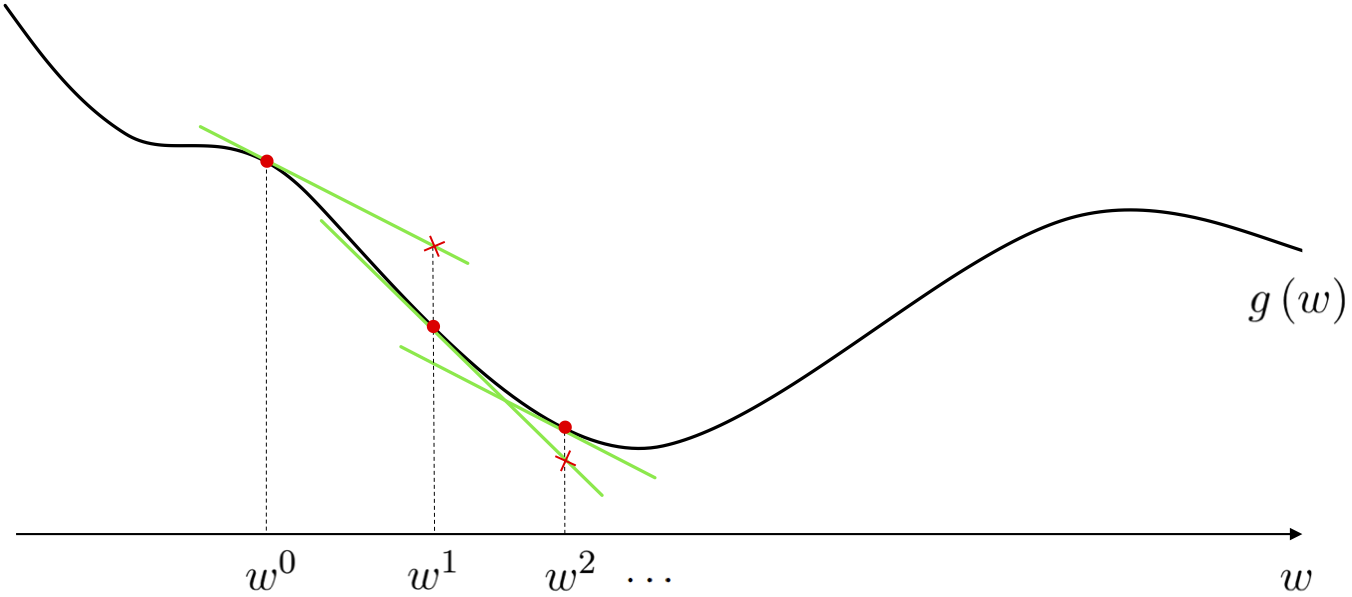

- The **<font color='red'>first derivative</font>** of a function helps form the best **linear approximation** to the function **locally** (called the *first-order Taylor series approximation*).

- Because the approximation **matches** the function locally, the descent direction of the tangent hyperplane (or the tangent line) is also a descent direction for the function itself.

- It is **easy** to compute the descent direction of a line or a hyperplane.

# The First-Order Optimality Condition

The first-order optimality condition states the behavior of how any differentiable function's first derivative(s) behave at its minima.

### The firt-order condition

In [154]:
from autograd import grad as compute_grad   # The only autograd function you may ever need
import autograd.numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform
import math
import copy


# visualize derivatie
def compare_2d3d(func1,func2,**kwargs):
    # input arguments
    view = [20,-65]
    if 'view' in kwargs:
        view = kwargs['view']
        
    # define input space
    w = np.linspace(-3,3,200)                  # input range for original function
    if 'w' in kwargs:
        w = kwargs['w']
        
    # define pts
    pt1 = 0
    if 'pt1' in kwargs:
        pt1 = kwargs['pt1']
        
    pt2 = [0,0]
    if 'pt2' in kwargs:
        pt2 = kwargs['pt2']
    
    # construct figure
    fig = plt.figure(figsize = (6,3))
          
    # remove whitespace from figure
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
    fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
    # create subplot with 3 panels, plot input function in center plot
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,2]) 
  
    ### draw 2d version ###
    ax1 = plt.subplot(gs[0]); 
    grad = compute_grad(func1)
    
    # generate a range of values over which to plot input function, and derivatives
    g_plot = func1(w)
    g_range = max(g_plot) - min(g_plot)             # used for cleaning up final plot
    ggap = g_range*0.2
    
    # grab the next input/output tangency pair, the center of the next approximation(s)
    pt1 = float(pt1)
    g_val = func1(pt1)

    # plot original function
    ax1.plot(w,g_plot,color = 'k',zorder = 1,linewidth=2)                          
    
    # plot the input/output tangency point
    ax1.scatter(pt1,g_val,s = 60,c = 'lime',edgecolor = 'k',linewidth = 2,zorder = 3)            # plot point of tangency

    #### plot first order approximation ####
    # plug input into the first derivative
    g_grad_val = grad(pt1)

    # compute first order approximation
    w1 = pt1 - 3
    w2 = pt1 + 3
    wrange = np.linspace(w1,w2, 100)
    h = g_val + g_grad_val*(wrange - pt1)

    # plot the first order approximation
    ax1.plot(wrange,h,color = 'lime',alpha = 0.5,linewidth = 3,zorder = 2)      # plot approx
    
    # make new x-axis
    ax1.plot(w,g_plot*0,linewidth=3,color = 'k')
    
    #### clean up panel ####
    # fix viewing limits on panel
    ax1.set_xlim([min(w),max(w)])
    ax1.set_ylim([min(min(g_plot) - ggap,-4),max(max(g_plot) + ggap,0.5)])

    # label axes
    ax1.set_xlabel('$w$',fontsize = 12,labelpad = -50)
    ax1.set_ylabel('$g(w)$',fontsize = 25,rotation = 0,labelpad = 50)
    
    ax1.grid(False)
    ax1.yaxis.set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    
    
    ### draw 3d version ###
    ax2 = plt.subplot(gs[1],projection='3d'); 
    grad = compute_grad(func2)
    w_val = [float(0),float(0)]
    
    # define input space
    w1_vals, w2_vals = np.meshgrid(w,w)
    w1_vals.shape = (len(w)**2,1)
    w2_vals.shape = (len(w)**2,1)
    w_vals = np.concatenate((w1_vals,w2_vals),axis=1).T
    g_vals = func2(w_vals) 
      
    # evaluation points
    w_val = np.array([float(pt2[0]),float(pt2[1])])
    w_val.shape = (2,1)
    g_val = func2(w_val)
    grad_val = grad(w_val)
    grad_val.shape = (2,1)  

    # create and evaluate tangent hyperplane
    w1tan_vals, w2tan_vals = np.meshgrid(w,w)
    w1tan_vals.shape = (len(w)**2,1)
    w2tan_vals.shape = (len(w)**2,1)
    wtan_vals = np.concatenate((w1tan_vals,w2tan_vals),axis=1).T

    #h = lambda weh: g_val +  np.dot( (weh - w_val).T,grad_val)
    h = lambda weh: g_val + (weh[0]-w_val[0])*grad_val[0] + (weh[1]-w_val[1])*grad_val[1]     
    h_vals = h(wtan_vals + w_val)

    # vals for cost surface, reshape for plot_surface function
    w1_vals.shape = (len(w),len(w))
    w2_vals.shape = (len(w),len(w))
    g_vals.shape = (len(w),len(w))
    w1tan_vals += w_val[0]
    w2tan_vals += w_val[1]
    w1tan_vals.shape =  (len(w),len(w))
    w2tan_vals.shape =  (len(w),len(w))
    h_vals.shape = (len(w),len(w))

    ### plot function ###
    ax2.plot_surface(w1_vals, w2_vals, g_vals, alpha = 0.5,color = 'w',rstride=25, cstride=25,linewidth=1,edgecolor = 'k',zorder = 2)

    ### plot z=0 plane ###
    ax2.plot_surface(w1_vals, w2_vals, g_vals*0, alpha = 0.1,color = 'w',zorder = 1,rstride=25, cstride=25,linewidth=0.3,edgecolor = 'k') 

    ### plot tangent plane ###
    ax2.plot_surface(w1tan_vals, w2tan_vals, h_vals, alpha = 0.4,color = 'lime',zorder = 1,rstride=50, cstride=50,linewidth=1,edgecolor = 'k')     

    # scatter tangency 
    ax2.scatter(w_val[0],w_val[1],g_val,s = 70,c = 'lime',edgecolor = 'k',linewidth = 2)
    
    ### clean up plot ###
    # plot x and y axes, and clean up
    ax2.xaxis.pane.fill = False
    ax2.yaxis.pane.fill = False
    ax2.zaxis.pane.fill = False

    #ax2.xaxis.pane.set_edgecolor('white')
    ax2.yaxis.pane.set_edgecolor('white')
    ax2.zaxis.pane.set_edgecolor('white')

    # remove axes lines and tickmarks
    ax2.w_zaxis.line.set_lw(0.)
    ax2.set_zticks([])
    ax2.w_xaxis.line.set_lw(0.)
    ax2.set_xticks([])
    ax2.w_yaxis.line.set_lw(0.)
    ax2.set_yticks([])

    # set viewing angle
    ax2.view_init(view[0],view[1])

    # set vewing limits
    wgap = (max(w) - min(w))*0.4
    y = max(w) + wgap
    ax2.set_xlim([-y,y])
    ax2.set_ylim([-y,y])
    
    zmin = min(np.min(g_vals),-0.5)
    zmax = max(np.max(g_vals),+0.5)
    ax2.set_zlim([zmin,zmax])

    # label plot
    fontsize = 12
    ax2.set_xlabel(r'$w_1$',fontsize = fontsize,labelpad = -30)
    ax2.set_ylabel(r'$w_2$',fontsize = fontsize,rotation = 0,labelpad=-30)
        
    plt.show()

    
def show_stationary(func1,func2,func3,**kwargs):
    '''
    Input three functions, draw each highlighting their stationary points and draw tangent lines, mark evaluations on first derivative as well
    '''
        
    # define input space
    w = np.linspace(-3,3,5000)                  # input range for original function
    if 'w' in kwargs:
        w = kwargs['w']

    # construct figure
    fig = plt.figure(figsize = (7,5))
          
    # remove whitespace from figure
    #fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
    fig.subplots_adjust(wspace=0.3,hspace=0.4)
       
    # create subplot with 3 panels, plot input function in center plot
    gs = gridspec.GridSpec(2, 3, width_ratios=[1,1,1]) 
  
    ###### draw function, tangent lines, etc., ######
    for k in range(3):
        ax = plt.subplot(gs[k]); 
        ax2 =  plt.subplot(gs[k+3],sharex=ax);  
        
        func = func1
        if k == 1:
            func = func2
        if k == 2:
            func = func3

        # generate a range of values over which to plot input function, and derivatives
        g_plot = func(w)
        grad = compute_grad(func)
        grad_plot = np.array([grad(s) for s in w])
        wgap = (max(w) - min(w))*0.1
        ggap = (max(g_plot) - min(g_plot))*0.1
        grad_gap = (max(grad_plot) - min(grad_plot))*0.1
        
        # plot first in top panel, derivative in bottom panel
        ax.plot(w,g_plot,color = 'k',zorder = 1,linewidth=2)   
        ax.set_title(r'$g(w)$',fontsize = 12)
        ax.set_xlim([min(w)-wgap,max(w)+wgap])
        ax.set_ylim([min(g_plot) - ggap, max(g_plot) + ggap])
        
        # plot derivative and horizontal axis
        ax2.plot(w,grad_plot,color = 'k',zorder = 1,linewidth = 2) 
        ax2.plot(w,grad_plot*0,color = 'k',zorder = 1,linewidth = 1,linestyle = '--') 
        ax2.set_title(r'$\frac{\mathrm{d}}{\mathrm{d}w}g(w)$',fontsize = 12)
        ax2.set_ylim([min(grad_plot) - grad_gap, max(grad_plot) + grad_gap])

        # clean up and label axes 
        ax.tick_params(labelsize=6)
        ax2.tick_params(labelsize=6)

        # determine zero derivative points 'visually'
        grad_station = copy.deepcopy(grad_plot)
        grad_station = np.sign(grad_station)
        ind = []
        for i in range(len(grad_station)-1):
            pt1 = grad_station[i]
            pt2 = grad_station[i+1]
            plot_pt1 = grad_plot[i]
            plot_pt2 = grad_plot[i+1]

            # if either point is zero add to list
            if pt1 == 0 or abs(plot_pt1) < 10**-5:
                ind.append(i)
            if pt2 == 0:
                ind.append(i+1)

            # if grad difference is small then sign change has taken place, add to list
            gap = abs(pt1 + pt2)
            if gap < 2 and pt1 !=0 and pt2 != 0:
                ind.append(i)

        # keep unique pts
        ind = np.unique(ind)
        
        # plot the input/output tangency points and tangent line
        wtan = np.linspace(-1,1,500)                  # input range for original function
        for pt in ind:
            # plot point
            w_val = w[pt]
            g_val = func(w_val)
            grad_val = grad(w_val)
            ax.scatter(w_val,g_val,s = 40,c = 'lime',edgecolor = 'k',linewidth = 2,zorder = 3)            # plot point of tangency
            ax2.scatter(w_val,grad_val,s = 40,c = 'lime',edgecolor = 'k',linewidth = 2,zorder = 3)            # plot point of tangency

            # plot tangent line in original space
            w1 = w_val - 1
            w2 = w_val + 1
            wrange = np.linspace(w1,w2, 100)
            h = g_val + 0*(wrange - w_val)
            ax.plot(wrange,h,color = 'lime',alpha = 0.5,linewidth = 1.5,zorder = 2)      # plot approx
    plt.show()
    




class Visualizer:
    '''
    Illustrate a run of your preferred optimization algorithm on a one or two-input function.  Run
    the algorithm first, and input the resulting weight history into this wrapper.
    ''' 
        
    ##### draw picture of function and run for two-input function ####       
    def two_input_contour_plot(self,g,w_hist,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,4.5))
        
        # show original contour function as well?
        show_original = True
        if 'show_original' in kwargs:
            show_original = kwargs['show_original']

        # create figure with single plot for contour
        gs = gridspec.GridSpec(1, 2) 
        ax1 = plt.subplot(gs[0],aspect='equal'); 
        ax2 = plt.subplot(gs[1],aspect='equal'); 
        
        if show_original == False:
            gs = gridspec.GridSpec(1, 1) 
            ax2 = plt.subplot(gs[0],aspect='equal'); 

        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax2,**kwargs)  # draw contour plot
        self.edgecolor = 'k'
        self.draw_weight_path(ax2,w_hist,**kwargs)        # draw path on contour plot
        
        if show_original == True:
            self.contour_plot_setup(g,ax1,**kwargs)  # draw contour plot

        # plot
        plt.show()

        
    ########################################################################################
    #### utility functions - for setting up / making contour plots, 3d surface plots, etc., ####
    # show contour plot of input function
    def contour_plot_setup(self,g,ax,**kwargs):
        xmin = -3.1
        xmax = 3.1
        ymin = -3.1
        ymax = 3.1
        if 'xmin' in kwargs:            
            xmin = kwargs['xmin']
        if 'xmax' in kwargs:
            xmax = kwargs['xmax']
        if 'ymin' in kwargs:            
            ymin = kwargs['ymin']
        if 'ymax' in kwargs:
            ymax = kwargs['ymax']      
        num_contours = 20
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']   
            
        # choose viewing range using weight history?
        if 'view_by_weights' in kwargs:
            view_by_weights = True
            weight_history = kwargs['weight_history']
            if view_by_weights == True:
                xmin = min([v[0] for v in weight_history])[0]
                xmax = max([v[0] for v in weight_history])[0]
                xgap = (xmax - xmin)*0.25
                xmin -= xgap
                xmax += xgap

                ymin = min([v[1] for v in weight_history])[0]
                ymax = max([v[1] for v in weight_history])[0]
                ygap = (ymax - ymin)*0.25
                ymin -= ygap
                ymax += ygap
 
        ### plot function as contours ###
        self.draw_contour_plot(g,ax,num_contours,xmin,xmax,ymin,ymax)
        
        ### cleanup panel ###
        ax.set_xlabel('$w_0$',fontsize = 14)
        ax.set_ylabel('$w_1$',fontsize = 14,labelpad = 15,rotation = 0)
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        # ax.set_xticks(np.arange(round(xmin),round(xmax)+1))
        # ax.set_yticks(np.arange(round(ymin),round(ymax)+1))
        
        # set viewing limits
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)

    ### function for creating contour plot
    def draw_contour_plot(self,g,ax,num_contours,xmin,xmax,ymin,ymax):
        #### define input space for function and evaluate ####
        w1 = np.linspace(xmin,xmax,400)
        w2 = np.linspace(ymin,ymax,400)
        w1_vals, w2_vals = np.meshgrid(w1,w2)
        w1_vals.shape = (len(w1)**2,1)
        w2_vals.shape = (len(w2)**2,1)
        h = np.concatenate((w1_vals,w2_vals),axis=1)
        func_vals = np.asarray([ g(np.reshape(s,(2,1))) for s in h])

        w1_vals.shape = (len(w1),len(w1))
        w2_vals.shape = (len(w2),len(w2))
        func_vals.shape = (len(w1),len(w2)) 
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        # set level ridges
        levelmin = min(func_vals.flatten())
        levelmax = max(func_vals.flatten())
        cutoff = 1
        cutoff = (levelmax - levelmin)*cutoff
        numper = 4
        levels1 = np.linspace(cutoff,levelmax,numper)
        num_contours -= numper

        # produce generic contours
        levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
        levels = np.unique(np.append(levels1,levels2))
        num_contours -= numper
        while num_contours > 0:
            cutoff = levels[1]
            levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
            levels = np.unique(np.append(levels2,levels))
            num_contours -= numper
   
        # plot the contours
        ax.contour(w1_vals, w2_vals, func_vals,levels = levels[1:],colors = 'k')
        ax.contourf(w1_vals, w2_vals, func_vals,levels = levels,cmap = 'Blues')

        ###### clean up plot ######
        ax.set_xlabel('$w_0$',fontsize = 12)
        ax.set_ylabel('$w_1$',fontsize = 12,rotation = 0)
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        
        
    ### makes color spectrum for plotted run points - from green (start) to red (stop)
    def make_colorspec(self,w_hist):
        # make color range for path
        s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
        s.shape = (len(s),1)
        t = np.ones(len(w_hist[round(len(w_hist)/2):]))
        t.shape = (len(t),1)
        s = np.vstack((s,t))
        colorspec = []
        colorspec = np.concatenate((s,np.flipud(s)),1)
        colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)
        return colorspec

    ### function for drawing weight history path
    def draw_weight_path(self,ax,w_hist,**kwargs):
        # make colors for plot
        colorspec = self.make_colorspec(w_hist)
        
        arrows = True
        if 'arrows' in kwargs:
            arrows = kwargs['arrows']

        ### plot function decrease plot in right panel
        for j in range(len(w_hist)):  
            w_val = w_hist[j]

            # plot each weight set as a point
            ax.scatter(w_val[0],w_val[1],s = 80,color = colorspec[j],edgecolor = self.edgecolor,linewidth = 2*math.sqrt((1/(float(j) + 1))),zorder = 3)

            # plot connector between points for visualization purposes
            if j > 0:
                pt1 = w_hist[j-1]
                pt2 = w_hist[j]
                
                # produce scalar for arrow head length
                pt_length = np.linalg.norm(pt1 - pt2)
                head_length = 0.1
                alpha = (head_length - 0.35)/pt_length + 1
                
                # if points are different draw error
                if np.linalg.norm(pt1 - pt2) > head_length and arrows == True:
                    if np.ndim(pt1) > 1:
                        pt1 = pt1.flatten()
                        pt2 = pt2.flatten()
                        
                        
                    # draw color connectors for visualization
                    w_old = pt1
                    w_new = pt2
                    ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = colorspec[j],linewidth = 2,alpha = 1,zorder = 2)      # plot approx
                    ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = 'k',linewidth = 3,alpha = 1,zorder = 1)      # plot approx
                

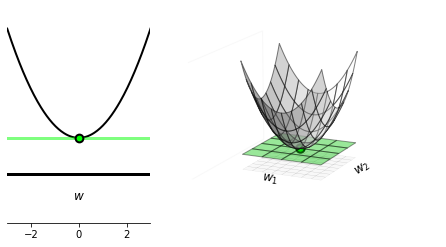

In [155]:
func1 = lambda w: w**2  + 3
func2 = lambda w: w[0]**2 + w[1]**2  + 3
compare_2d3d(func1 = func1,func2 = func2)

- We draw the first-order approximation (a tangent line/hyperplane) at the function's minimum.
- In both examples, the tangent line/hyperplane is perfectly flat, indicating that the first derivative(s) is exactly **zero** at the function's minimum.

The value of <font color='red'>first-order derivative(s)</font> provide a convenient way of *characterizing* minimum values of a function $g$. When $N=1$, any point $v$ where 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g\left(v\right)=0
\end{equation}

is a <font color='red'>potential minimum</font>.

Analogously with general $N$ dimensional input, any $N$ dimensional point $\mathbf{v}$ where *every* **<font color='red'>partial derivative</font>** of $g$ is zero, that is

\begin{equation}
\begin{array}
\
\frac{\partial}{\partial w_{1}}g(\mathbf{v})=0\\
\frac{\partial}{\partial w_{2}}g(\mathbf{v})=0\\
\,\,\,\,\,\,\,\,\,\,\vdots \\
\frac{\partial}{\partial w_{N}}g(\mathbf{v})=0
\end{array}
\end{equation}

is a *<font color='red'>potential minimum</font>*. This system of $N$ equations is naturally referred to as the **<font color='red'>first order system of equations</font>**.  We can write the first order system more compactly using gradient notation as 

\begin{equation}
\nabla g\left(\mathbf{v}\right)=\mathbf{0}_{N\times1}.
\end{equation}

The first order optimality condition translates the problem of identifying a function's minimum points into the task of solving a system of $N$ first order equations.

However, there are two problems with the first-order characterization of minima.

1. It is virtually impossible (with few exceptions) to solve a general function's first order system of equations for 'closed form' solutions.
2. The first order optimality conditions characterizes not only **minima**, but also **maxima** and **saddle points** of a function.

### Example 1: Finding points of zero derivative for single-input functions

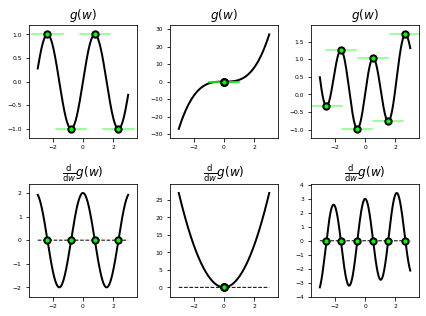

In [156]:
func1 = lambda w: np.sin(2*w)
func2 = lambda w: w**3
func3 = lambda w: np.sin(3*w) + 0.1*w**2
show_stationary(func1 = func1,func2 = func2,func3 = func3)

It is not only *global minima* that have zero derivatives, but other points, e.g., local minima, local and global maxima, and saddle points, as well.

Points having zero-valued derivative(s) are collectively referred to as **<font color='red'>stationary points</font>** for **critical points**.

**The first order condition for optimality**: Stationary points of a function $g$ (including minimax, maxima, and saddle points) satisfy the first order condition
    
\begin{equation*}
\nabla g\left(\mathbf{v}\right)=\mathbf{0}_{N\times1}
\end{equation*}

If a function is *<font color='red'>convex</font>* (e.g., a quadratic function), then any point at which a function satisfies the first order condition must be a global minima. A convex function has no maxima nor saddle points.

### Example 2: A simple looking function but difficult to compute (algebraically) global minimum

\begin{equation*}
g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w\right)
\end{equation*}

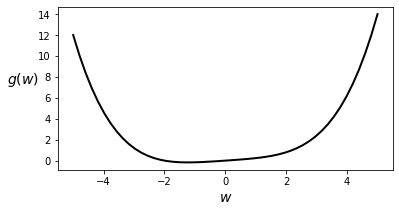

In [157]:
w = np.linspace(-5,5,50)
g = lambda w: 1/50*(w**4 + w**2 + 10*w)
figure = plt.figure(figsize=(6,3))
plt.plot(w,g(w),linewidth=2,color='k')
plt.xlabel('$w$',fontsize=14)
plt.ylabel('$g(w)$',rotation=0,labelpad=15,fontsize=14)
plt.show()

\begin{equation*}
\frac{\mathrm{d}}{\mathrm{d} w}g(w) = \frac{1}{50}\left(4w^3 + 2w + 10\right) = 2w^3 + w + 5 = 0 = 0
\end{equation*}

\begin{equation*}
\frac{\mathrm{d}}{\mathrm{d} w}g(w) = \frac{1}{50}\left(4w^3 + 2w + 10\right) = 2w^3 + w + 5 = 0 = 0
\end{equation*}

The one providing the minimum of the function $g$ is:
\begin{equation*}
w = \frac{\sqrt[\leftroot{-2}\uproot{2}3]{\sqrt[\leftroot{-2}\uproot{2}]{2031} - 45}}{6^{\frac{2}{3}}} - \frac{1}{\sqrt[\leftroot{-2}\uproot{2}3]{6\left(\sqrt{2031}-45\right)}}
\end{equation*}

which can be computed - after much toil - using [centuries old tricks developed for just such problems](http://mathworld.wolfram.com/CubicFormula.html). 

### Example 3: Stationary points of a general multi-input quadratic function

Take the general multi-input quadratic function

\begin{equation}
g\left(\mathbf{w}\right)=a + \mathbf{b}^{T}\mathbf{w} + \mathbf{w}^{T}\mathbf{C}\mathbf{w}
\end{equation}

where $\mathbf{C}$ is an $N\times N$ symmetric matrix, $\mathbf{b}$ is an $N\times 1$ vector, and $a$ is a scalar.

Computing the first derivative (gradient) we have

\begin{equation}
\nabla g\left(\mathbf{w}\right)=2\mathbf{C}\mathbf{w}+\mathbf{b}
\end{equation}

Setting this equal to zero gives a *symmetric and linear* system of equations of the form

\begin{equation}
\mathbf{C}\mathbf{w}=-\frac{1}{2}\mathbf{b}
\end{equation}

whose solutions are stationary points of the original function.

### Coordinate descent and the first order optimality condition

For a given cost function $g\left(\mathbf{w}\right)$ taking in $N$ dimensional input, the stationary points (minima included) of this function are those satisfying the system of equations

\begin{equation*}
\nabla g\left(\mathbf{v}\right)=\mathbf{0}_{N\times1}
\end{equation*}
or written out one equation at-a-time as

\begin{equation}
\begin{array}
\
\frac{\partial}{\partial w_{1}}g(\mathbf{v})=0\\
\frac{\partial}{\partial w_{2}}g(\mathbf{v})=0\\
\,\,\,\,\,\,\,\,\,\,\vdots \\
\frac{\partial}{\partial w_{N}}g(\mathbf{v})=0.
\end{array}
\end{equation}

Instead of solving a first order system *<font color='red'>simulatenously</font>*, we can solve them **<font color='red'>sequentially</font>** in a coordinate-wise approach if each equation can be solved for the closed form.
if such an equation can be solved for the closed form.
\begin{equation*}
\frac{\partial}{\partial w_{n}}g(\mathbf{v})=0
\end{equation*}

- We first initialize at an input point $\mathbf{w}^0$, and begin by updating the first coordinate
\begin{equation*}
\frac{\partial}{\partial w_{1}}g\left(\mathbf{w}^0\right)=0 
\end{equation*}
for the optimal first weight $w_1^{\star}$.  
- We then update the first coordinate of the vector $\mathbf{w}^0$ with this solution, and call the updated set of weights $\mathbf{w}^1$.

- Continuing this pattern to update the $n^{th}$ weight we solve
\begin{equation*}
\frac{\partial}{\partial w_{n}}g\left(\mathbf{w}^{n-1}\right)=0 
\end{equation*}
for $w_n^{\star}$, and update the $n^{th}$ weight using this value forming the updated set of weights $\mathbf{w}^n$.  

After we sweep through all $N$ weights a single time we can refine our solution by sweeping through the weights again (as with any other coordinate wise method).  At the $k^{th}$ such sweep we update the $n^{th}$ weight by solving the single equation
\begin{equation*}
\frac{\partial}{\partial w_{n}}g\left(\mathbf{w}^{k + n-1}\right)=0 
\end{equation*}
and update the $n^{th}$ weight of $\mathbf{w}^{k + n-1}$, and so on.

### Example 4: Minimizing convex quadratic functions via first order coordinate descent

In [158]:
def coordinate_descent_for_quadratic(g,w,max_its,a,b,C):
    '''
    Coordinate descent wrapper for general quadratic function. Here
    
    a - a constant
    b - an Nx1 vector
    C - an NxN matrix (symmetric and all nonnegative eigenvalues)
    '''
        
    # record weights and cost history 
    weight_history = [copy.deepcopy(w)]     
    cost_history = [g(w)]
    N = np.size(w)
    
    # outer loop - each is a sweep through every variable once
    for k in range(max_its):
        # inner loop - each is a single variable update
        for n in range(N):
            w[n] = -(np.dot(C[n,:],w) - C[n,n]*w[n] + 0.5*b[n])/float(C[n,n])
            
            # record weights and cost value at each step
            weight_history.append(copy.deepcopy(w))
            cost_history.append(g(w))

    return weight_history,cost_history

We minimize the simple quadratic 

\begin{equation*}
g(w_0,w_1) = w_0^2 + w_1^2 + 2
\end{equation*}

which can be written in vector-matrix 
\begin{equation*}
g\left(\mathbf{w}\right) = a + \mathbf{b}^{T}\mathbf{w} + \mathbf{w}^{T}\mathbf{C}\mathbf{w}
\end{equation*}

where $a = 2$, $\mathbf{b} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$, and $\mathbf{C} = \begin{bmatrix} 1 \,\, 0 \\ 0 \,\, 1 \end{bmatrix}$.

We initialize at $\mathbf{w} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$ and run $1$ iteration of the algorithm.

In [159]:
plotter = Visualizer()

\begin{equation*}
g(w_0,w_1) = w_0^2 + w_1^2 + 2 = 2 + \begin{bmatrix}0 & 0\end{bmatrix}\begin{bmatrix}w_1 \\ w_2\end{bmatrix} + \begin{bmatrix}w_1 & w_2\end{bmatrix} \begin{bmatrix} 1 \,\, 0 \\ 0 \,\, 1 \end{bmatrix} \begin{bmatrix}w_1 \\ w_2\end{bmatrix}
\end{equation*}

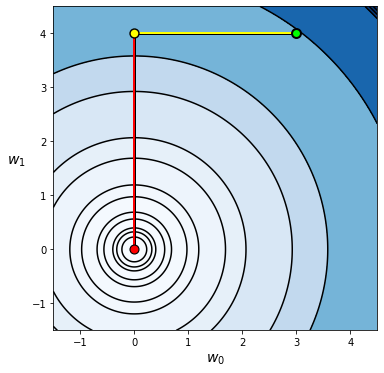

In [160]:
a = 2
b = np.zeros((2,1))
C = np.eye(2)
# a quadratic function defined using the constants above
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,C),w))[0]
# initialization
w = np.array([3,4])
max_its = 1
weight_history,cost_history = coordinate_descent_for_quadratic(g,w,max_its,a,b,C)
plotter.two_input_contour_plot(g,weight_history,xmin = -1.5,xmax = 4.5,ymin = -1.5,ymax = 4.5,num_contours = 30,show_original = False)

\begin{equation*}
g(w_0,w_1) = a + \mathbf{b}^{T}\mathbf{w} + \mathbf{w}^{T}\mathbf{C}\mathbf{w} = 20 + \begin{bmatrix}0 & 0\end{bmatrix}\begin{bmatrix}w_1 \\ w_2\end{bmatrix} + \begin{bmatrix}w_1 & w_2\end{bmatrix} \begin{bmatrix} 2 \,\, 1 \\ 1 \,\, 2 \end{bmatrix} \begin{bmatrix}w_1 \\ w_2\end{bmatrix}
\end{equation*}

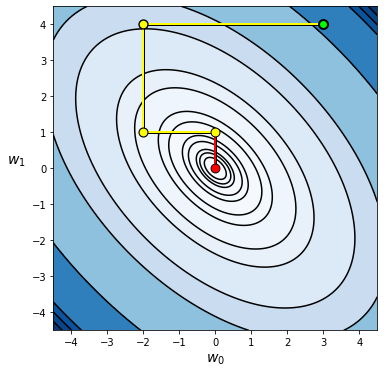

In [161]:
a = 20
b = np.zeros((2,1))
C = np.array([[2,1],[1,2]])
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,C),w))[0]
w = np.array([3,4])
max_its = 2
weight_history,cost_history = coordinate_descent_for_quadratic(g,w,max_its,a,b,C)
plotter.two_input_contour_plot(g,weight_history,xmin = -4.5,xmax = 4.5,ymin = -4.5,ymax = 4.5,num_contours = 30,show_original = False)

## Geometry of First-Order Taylor Series

- We discuss important characteristics of the *<font color='red'>hyperplane</font>* including the direction of *steepest ascent* and *steepest descent*.
- A special hyperplane: the first-order Taylor series approximation to a function.

### The anatomy of hyperlanes

A general $N$-dimensional hyperplane can be characterized as:
    
\begin{equation*}
h(w_1,w_2,\ldots,w_N)=a+b_1 w_1 + b_2 w_2 + \ldots + b_N w_N
\end{equation*}

where $a, b_1, \ldots, b_N$ are scalar parameters. We can rewrite $h$ more compactly as:

\begin{equation*}
h(\mathbf{w})=a+\mathbf{b}^T\mathbf{w}
\end{equation*}

When $N=1$, we have $h(w)=a+bw$, which is the formula for a *one-dimensional* line in a **two-dimensional** space whose input space (characterized by $w$) is *one-dimensional*.

For general $N$, $h(\mathbf{w})=a+\mathbf{b}^T\mathbf{w}$ is an $N$-dimensional hyperplane in an $(N+1)$-dimensional space whose input space (characterized by $w_1,w_2,\ldots,w_N$) is $N$-dimensional.

### Steepest ascent and descent directions

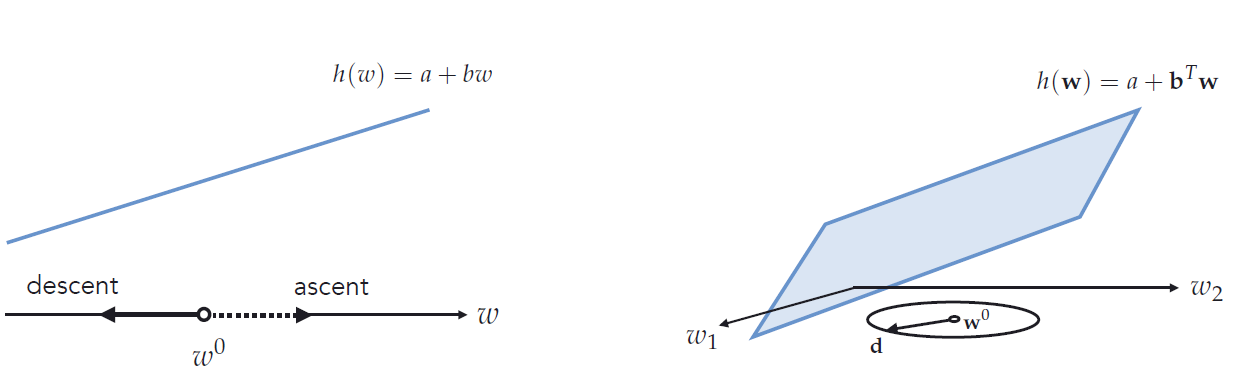

When $N=1$, for any point $w^0$ in the input space, there are only 2 directions:
- Moving to the right of $w^0$ *increases* the value of $h$, and hence it is an *ascent* direction.
- Moving to the left of $w^0$ *decreases* the value of $h$, and hence it is a *descent* direction.

When $N>1$, thre are infinitely many directions to move in, some providing *ascent*, *descent*, or preserving the value of $h$.

How can we find the direction that produces the largest ascent (or descent), commonly referred to as the direction of *steepest ascent* (or *descent*).

To search for the direction of <font color='red'>steepest ascent</font> at a given point $\mathbf{w}^0$:

\begin{equation*}
\underset{\mathbf{d}}{\text{maximize}}\,\,h\left(\mathbf{w}^{0} +  \mathbf{d}\right)
\end{equation*}
over all unit-length vectors $\mathbf{d}$.

Note that $h\left(\mathbf{w}^{0} +  \mathbf{d}\right)$ can be written as:
\begin{equation}
a+\mathbf{b}^T\left(\mathbf{w}^0+\mathbf{d}\right) = a + \mathbf{b}^T\mathbf{w}^0 + \mathbf{b}^T\mathbf{d}
\end{equation}    
where the first two terms are constant with respect to $\mathbf{d}$.

Therefore, maximizing the value of $h\left(\mathbf{w}^{0} +  \mathbf{d}\right)$ is equivalent to maximizing $\mathbf{b}^T\mathbf{d}$.

We have:
\begin{equation*}
\mathbf{b}^{T}\mathbf{d} = \Vert\mathbf{b}\Vert_2 \Vert\mathbf{d}\Vert_2\cos{(\theta)},
\end{equation*}
where $\Vert\mathbf{b}\Vert_2$ does not change with respect to $\mathbf{d}$, and $\Vert\mathbf{d}\Vert_2=1$. 

Then the optimization problem becomes:
\begin{equation*}
\underset{\theta}{\text{maximize}}\,\,\cos{(\theta)},
\end{equation*}
where $\theta$ is the angle between the vectors $\mathbf{b}$ and $\mathbf{d}$.

- Of all unit directions, $\mathbf{d}=\frac{\mathbf{b}}{\Vert\mathbf{b}\Vert_2}$ provides the **<font color='red'>steepest ascent</font>** (where $\theta=0$ and $\cos{(\theta)}=1)$

- Similarly, the unit direction $\mathbf{d}=\frac{-\mathbf{b}}{\Vert\mathbf{b}\Vert_2}$ provides the **<font color='blue'>steepest descent</font>** (where $\theta=\pi$ and $\cos{(\theta)}=-1)$

### The gradient and the direction of steepest ascent/descent

- A function $g(\mathbf{w})$ can be approximated locally around a given point $\mathbf{w}^0$ by a hyperplane $h(\mathbf{w})$:

\begin{equation*}
h(\mathbf{w})=g(\mathbf{w}^0)+\nabla g(\mathbf{w}^0)^T(\mathbf{w}-\mathbf{w}^0)
\end{equation*}
which can be rewritten as $h(\mathbf{w})=a+\mathbf{b}^T\mathbf{w}$ (as previously).

- Then, we have:
    
\begin{equation*}
a = g(\mathbf{w}^0)-\nabla g(\mathbf{w}^0)^T\mathbf{w}^0 \,\,\,\, \text{and} \,\,\,\, \mathbf{b}=\nabla g(\mathbf{w}^0)
\end{equation*}

- This hyperplane is the <font color='red'>first-order Taylor series approximation</font> of $g$ at $\mathbf{w}^0$, and is **tangent** to $g$ at this point.

- Because $h$ is constructed to closely approximate $g$ near the point $\mathbf{w}^0$, its steepest ascent and descent directions also tell us the direction to travel to increase or decrease the value of the function $g$ itself **at/near** the point $\mathbf{w}^0$.

# Gradient Descent

In [162]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.animation as animation
from matplotlib import gridspec
from IPython.display import clear_output
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform

import autograd.numpy as np
from autograd import grad as compute_grad  
from autograd import value_and_grad 
from autograd.misc.flatten import flatten_func
import math
import time

class static_visualizer:
    '''
    Illustrate a run of your preferred optimization algorithm on a one or two-input function.  Run
    the algorithm first, and input the resulting weight history into this wrapper.
    ''' 

    ##### draw picture of function and run for single-input function ####       
    def single_input_plot(self,g,weight_histories,cost_histories,**kwargs):        
        # adjust viewing range
        wmin = -3.1
        wmax = 3.1
        if 'wmin' in kwargs:            
            wmin = kwargs['wmin']
        if 'wmax' in kwargs:
            wmax = kwargs['wmax']
            
        onerun_perplot = False
        if 'onerun_perplot' in kwargs:
            onerun_perplot = kwargs['onerun_perplot']
            
        ### initialize figure
        fig = plt.figure(figsize = (9,4))
        artist = fig
        
        # remove whitespace from figure
        #fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        #fig.subplots_adjust(wspace=0.01,hspace=0.01)

        # create subplot with 2 panels, plot input function in center plot
        gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
        ax1 = plt.subplot(gs[0]); 
        ax2 = plt.subplot(gs[1]); 

        ### plot function in both panels
        w_plot = np.linspace(wmin,wmax,500)
        g_plot = g(w_plot)
        gmin = np.min(g_plot)
        gmax = np.max(g_plot)
        g_range = gmax - gmin
        ggap = g_range*0.1
        gmin -= ggap
        gmax += ggap
        
        # plot function, axes lines
        ax1.plot(w_plot,g_plot,color = 'k',zorder = 2)                           # plot function
        ax1.axhline(y=0, color='k',zorder = 1,linewidth = 0.25)
        ax1.axvline(x=0, color='k',zorder = 1,linewidth = 0.25)
        ax1.set_xlabel(r'$w$',fontsize = 13)
        ax1.set_ylabel(r'$g(w)$',fontsize = 13,rotation = 0,labelpad = 25)            
        ax1.set_xlim(wmin,wmax)
        ax1.set_ylim(gmin,gmax)
        
        ax2.plot(w_plot,g_plot,color = 'k',zorder = 2)                           # plot function
        ax2.axhline(y=0, color='k',zorder = 1,linewidth = 0.25)
        ax2.axvline(x=0, color='k',zorder = 1,linewidth = 0.25)
        ax2.set_xlabel(r'$w$',fontsize = 13)
        ax2.set_ylabel(r'$g(w)$',fontsize = 13,rotation = 0,labelpad = 25)   
        ax2.set_xlim(wmin,wmax)
        ax2.set_ylim(gmin,gmax)        
       
        #### loop over histories and plot each
        for j in range(len(weight_histories)):
            w_hist = weight_histories[j]
            c_hist = cost_histories[j]
            
            # colors for points --> green as the algorithm begins, yellow as it converges, red at final point
            s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
            s.shape = (len(s),1)
            t = np.ones(len(w_hist[round(len(w_hist)/2):]))
            t.shape = (len(t),1)
            s = np.vstack((s,t))
            self.colorspec = []
            self.colorspec = np.concatenate((s,np.flipud(s)),1)
            self.colorspec = np.concatenate((self.colorspec,np.zeros((len(s),1))),1)
            
            ### plot all history points
            ax = ax2
            if onerun_perplot == True:
                if j == 0:
                    ax = ax1
                if j == 1:
                    ax = ax2
            for k in range(len(w_hist)):
                # pick out current weight and function value from history, then plot
                w_val = w_hist[k]
                g_val = c_hist[k]
                ax.scatter(w_val,g_val,s = 90,color = self.colorspec[k],edgecolor = 'k',linewidth = 0.5*((1/(float(k) + 1)))**(0.4),zorder = 3,marker = 'X')            # evaluation on function
                ax.scatter(w_val,0,s = 90,facecolor = self.colorspec[k],edgecolor = 'k',linewidth = 0.5*((1/(float(k) + 1)))**(0.4), zorder = 3)


    ##### draw picture of function and run for two-input function ####       
    def two_input_surface_contour_plot(self,g,w_hist,**kwargs):
        ### input arguments ###        
        num_contours = 10
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']
           
        view = [20,20]
        if 'view' in kwargs:
            view = kwargs['view']
            
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (11,5))
        self.edgecolor = 'k'

        # create subplot with 3 panels, plot input function in center plot
        # this seems to be the best option for whitespace management when using
        # both a surface and contour plot in the same figure
        gs = gridspec.GridSpec(1, 3, width_ratios=[1,5,10]) 
        ax1 = plt.subplot(gs[1],projection='3d'); 
        ax2 = plt.subplot(gs[2],aspect='equal'); 
        
        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        # plot 3d surface and path in left panel
        self.draw_surface(g,ax1,**kwargs)
        self.show_inputspace_path(w_hist,ax1)
        ax1.view_init(view[0],view[1])
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax2,**kwargs)  # draw contour plot
        self.draw_weight_path(ax2,w_hist)              # draw path on contour plot

        # plot
        plt.show()


    ##### draw picture of function and run for two-input function ####       
    def two_input_contour_horiz_plots(self,g,histories,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,4.5))

        # create figure with single plot for contour
        num_plots = len(histories)
        axs = gridspec.GridSpec(1, num_plots) 
        
        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        # define edgecolors 
        edgecolors = ['k','magenta','aqua','blueviolet','chocolate']
        
        # loop over histories and plot
        for j in range(num_plots):
            # get next weight history
            w_hist = histories[j]
            
            # create subplot
            ax = plt.subplot(axs[j],aspect='equal'); 

            ### make contour right plot - as well as horizontal and vertical axes ###
            self.contour_plot_setup(g,ax,**kwargs)           # draw contour plot
            self.edgecolor = edgecolors[j]
            self.draw_weight_path(ax,w_hist,**kwargs)        # draw path on contour plot

        # plot
        plt.show()
        
    
    ##### draw picture of function and run for two-input function ####       
    def two_input_contour_plot(self,g,w_hist,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,4.5))
        
        # show original contour function as well?
        show_original = True
        if 'show_original' in kwargs:
            show_original = kwargs['show_original']

        # create figure with single plot for contour
        gs = gridspec.GridSpec(1, 2) 
        ax1 = plt.subplot(gs[0],aspect='equal'); 
        ax2 = plt.subplot(gs[1],aspect='equal'); 
        
        if show_original == False:
            gs = gridspec.GridSpec(1, 1) 
            ax2 = plt.subplot(gs[0],aspect='equal'); 

        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax2,**kwargs)  # draw contour plot
        self.edgecolor = 'k'
        self.draw_weight_path(ax2,w_hist,**kwargs)        # draw path on contour plot
        
        if show_original == True:
            self.contour_plot_setup(g,ax1,**kwargs)  # draw contour plot

        # plot
        plt.show()


    ##### draw picture of function and run for two-input function ####       
    def two_input_original_contour_plot(self,g,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,4.5))

        # create figure with single plot for contour
        gs = gridspec.GridSpec(1, 1) 
        ax1 = plt.subplot(gs[0],aspect='equal'); 

        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax1,**kwargs)  # draw contour plot

        # plot
        plt.show()     
        
        
    # compare cost histories from multiple runs
    def plot_cost_histories(self,histories,start,**kwargs):
        # plotting colors
        colors = ['k','magenta','aqua','blueviolet','chocolate']
        
        # initialize figure
        fig = plt.figure(figsize = (10,3))

        # create subplot with 1 panel
        gs = gridspec.GridSpec(1, 1) 
        ax = plt.subplot(gs[0]); 
        
        # any labels to add?        
        labels = [' ',' ']
        if 'labels' in kwargs:
            labels = kwargs['labels']
            
        # plot points on cost function plot too?
        points = False
        if 'points' in kwargs:
            points = kwargs['points']

        # run through input histories, plotting each beginning at 'start' iteration
        for c in range(len(histories)):
            history = histories[c]
            #label = 0
            #if c == 0:
            #    label = labels[0]
            #else:
            #    label = labels[1]
            label = labels[c]
                
            # check if a label exists, if so add it to the plot
            if np.size(label) == 0:
                ax.plot(np.arange(start,len(history),1),history[start:],linewidth = 3*(0.8)**(c),color = colors[c]) 
            else:               
                ax.plot(np.arange(start,len(history),1),history[start:],linewidth = 3*(0.8)**(c),color = colors[c],label = label) 
                
            # check if points should be plotted for visualization purposes
            if points == True:
                ax.scatter(np.arange(start,len(history),1),history[start:],s = 90,color = colors[c],edgecolor = 'w',linewidth = 2,zorder = 3) 


        # clean up panel
        xlabel = 'step $k$'
        if 'xlabel' in kwargs:
            xlabel = kwargs['xlabel']
        ylabel = r'$g\left(\mathbf{w}^k\right)$'
        if 'ylabel' in kwargs:
            ylabel = kwargs['ylabel']
        ax.set_xlabel(xlabel,fontsize = 14)
        ax.set_ylabel(ylabel,fontsize = 14,rotation = 0,labelpad = 25)
        if np.size(label) > 0:
            anchor = (1,1)
            if 'anchor' in kwargs:
                anchor = kwargs['anchor']
            plt.legend(loc='upper right', bbox_to_anchor=anchor)
            #leg = ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

        ax.set_xlim([start - 0.5,len(history) - 0.5])
        
       # fig.tight_layout()
        plt.show()

        
    ########################################################################################
    #### utility functions - for setting up / making contour plots, 3d surface plots, etc., ####
    # show contour plot of input function
    def contour_plot_setup(self,g,ax,**kwargs):
        xmin = -3.1
        xmax = 3.1
        ymin = -3.1
        ymax = 3.1
        if 'xmin' in kwargs:            
            xmin = kwargs['xmin']
        if 'xmax' in kwargs:
            xmax = kwargs['xmax']
        if 'ymin' in kwargs:            
            ymin = kwargs['ymin']
        if 'ymax' in kwargs:
            ymax = kwargs['ymax']      
        num_contours = 20
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']   
            
        # choose viewing range using weight history?
        if 'view_by_weights' in kwargs:
            view_by_weights = True
            weight_history = kwargs['weight_history']
            if view_by_weights == True:
                xmin = min([v[0] for v in weight_history])[0]
                xmax = max([v[0] for v in weight_history])[0]
                xgap = (xmax - xmin)*0.25
                xmin -= xgap
                xmax += xgap

                ymin = min([v[1] for v in weight_history])[0]
                ymax = max([v[1] for v in weight_history])[0]
                ygap = (ymax - ymin)*0.25
                ymin -= ygap
                ymax += ygap
 
        ### plot function as contours ###
        self.draw_contour_plot(g,ax,num_contours,xmin,xmax,ymin,ymax)
        
        ### cleanup panel ###
        ax.set_xlabel('$w_0$',fontsize = 14)
        ax.set_ylabel('$w_1$',fontsize = 14,labelpad = 15,rotation = 0)
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        # ax.set_xticks(np.arange(round(xmin),round(xmax)+1))
        # ax.set_yticks(np.arange(round(ymin),round(ymax)+1))
        
        # set viewing limits
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)

    ### function for creating contour plot
    def draw_contour_plot(self,g,ax,num_contours,xmin,xmax,ymin,ymax):
        #### define input space for function and evaluate ####
        w1 = np.linspace(xmin,xmax,400)
        w2 = np.linspace(ymin,ymax,400)
        w1_vals, w2_vals = np.meshgrid(w1,w2)
        w1_vals.shape = (len(w1)**2,1)
        w2_vals.shape = (len(w2)**2,1)
        h = np.concatenate((w1_vals,w2_vals),axis=1)
        func_vals = np.asarray([ g(np.reshape(s,(2,1))) for s in h])

        w1_vals.shape = (len(w1),len(w1))
        w2_vals.shape = (len(w2),len(w2))
        func_vals.shape = (len(w1),len(w2)) 
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        # set level ridges
        levelmin = min(func_vals.flatten())
        levelmax = max(func_vals.flatten())
        cutoff = 1
        cutoff = (levelmax - levelmin)*cutoff
        numper = 4
        levels1 = np.linspace(cutoff,levelmax,numper)
        num_contours -= numper

        # produce generic contours
        levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
        levels = np.unique(np.append(levels1,levels2))
        num_contours -= numper
        while num_contours > 0:
            cutoff = levels[1]
            levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
            levels = np.unique(np.append(levels2,levels))
            num_contours -= numper
   
        # plot the contours
        ax.contour(w1_vals, w2_vals, func_vals,levels = levels[1:],colors = 'k')
        ax.contourf(w1_vals, w2_vals, func_vals,levels = levels,cmap = 'Blues')

        ###### clean up plot ######
        ax.set_xlabel('$w_0$',fontsize = 12)
        ax.set_ylabel('$w_1$',fontsize = 12,rotation = 0)
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        
        
    ### makes color spectrum for plotted run points - from green (start) to red (stop)
    def make_colorspec(self,w_hist):
        # make color range for path
        s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
        s.shape = (len(s),1)
        t = np.ones(len(w_hist[round(len(w_hist)/2):]))
        t.shape = (len(t),1)
        s = np.vstack((s,t))
        colorspec = []
        colorspec = np.concatenate((s,np.flipud(s)),1)
        colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)
        return colorspec

    ### function for drawing weight history path
    def draw_weight_path(self,ax,w_hist,**kwargs):
        # make colors for plot
        colorspec = self.make_colorspec(w_hist)
        
        arrows = True
        if 'arrows' in kwargs:
            arrows = kwargs['arrows']

        ### plot function decrease plot in right panel
        for j in range(len(w_hist)):  
            w_val = w_hist[j]

            # plot each weight set as a point
            ax.scatter(w_val[0],w_val[1],s = 80,color = colorspec[j],edgecolor = self.edgecolor,linewidth = 2*math.sqrt((1/(float(j) + 1))),zorder = 3)

            # plot connector between points for visualization purposes
            if j > 0:
                pt1 = w_hist[j-1]
                pt2 = w_hist[j]
                
                # produce scalar for arrow head length
                pt_length = np.linalg.norm(pt1 - pt2)
                head_length = 0.1
                alpha = (head_length - 0.35)/pt_length + 1
                
                # if points are different draw error
                if np.linalg.norm(pt1 - pt2) > head_length and arrows == True:
                    if np.ndim(pt1) > 1:
                        pt1 = pt1.flatten()
                        pt2 = pt2.flatten()
                        
                        
                    # draw color connectors for visualization
                    w_old = pt1
                    w_new = pt2
                    ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = colorspec[j],linewidth = 2,alpha = 1,zorder = 2)      # plot approx
                    ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = 'k',linewidth = 3,alpha = 1,zorder = 1)      # plot approx


    ### draw surface plot
    def draw_surface(self,g,ax,**kwargs):
        xmin = -3.1
        xmax = 3.1
        ymin = -3.1
        ymax = 3.1
        if 'xmin' in kwargs:            
            xmin = kwargs['xmin']
        if 'xmax' in kwargs:
            xmax = kwargs['xmax']
        if 'ymin' in kwargs:            
            ymin = kwargs['ymin']
        if 'ymax' in kwargs:
            ymax = kwargs['ymax']   
            
        #### define input space for function and evaluate ####
        w1 = np.linspace(xmin,xmax,200)
        w2 = np.linspace(ymin,ymax,200)
        w1_vals, w2_vals = np.meshgrid(w1,w2)
        w1_vals.shape = (len(w1)**2,1)
        w2_vals.shape = (len(w2)**2,1)
        h = np.concatenate((w1_vals,w2_vals),axis=1)
        func_vals = np.asarray([g(np.reshape(s,(2,1))) for s in h])

        ### plot function as surface ### 
        w1_vals.shape = (len(w1),len(w2))
        w2_vals.shape = (len(w1),len(w2))
        func_vals.shape = (len(w1),len(w2))
        ax.plot_surface(w1_vals, w2_vals, func_vals, alpha = 0.1,color = 'w',rstride=25, cstride=25,linewidth=1,edgecolor = 'k',zorder = 2)

        # plot z=0 plane 
        ax.plot_surface(w1_vals, w2_vals, func_vals*0, alpha = 0.1,color = 'w',zorder = 1,rstride=25, cstride=25,linewidth=0.3,edgecolor = 'k') 
                
        # clean up axis
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False

        ax.xaxis.pane.set_edgecolor('white')
        ax.yaxis.pane.set_edgecolor('white')
        ax.zaxis.pane.set_edgecolor('white')

        ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        
        ax.set_xlabel('$w_0$',fontsize = 14)
        ax.set_ylabel('$w_1$',fontsize = 14,rotation = 0)
        ax.set_title('$g(w_0,w_1)$',fontsize = 14)
        
    ### plot points and connectors in input space in 3d plot        
    def show_inputspace_path(self,w_hist,ax):
        # make colors for plot
        colorspec = self.make_colorspec(w_hist)
        
        for k in range(len(w_hist)):
            pt1 = w_hist[k]
            ax.scatter(pt1[0],pt1[1],0,s = 60,color = colorspec[k],edgecolor = 'k',linewidth = 0.5*math.sqrt((1/(float(k) + 1))),zorder = 3)
            if k < len(w_hist)-1:
                pt2 = w_hist[k+1]
                if np.linalg.norm(pt1 - pt2) > 10**(-3):
                    # draw arrow in left plot
                    a = Arrow3D([pt1[0],pt2[0]], [pt1[1],pt2[1]], [0, 0], mutation_scale=10, lw=2, arrowstyle="-|>", color="k")
                    ax.add_artist(a)


#### custom 3d arrow and annotator functions ###    
# nice arrow maker from https://stackoverflow.com/questions/11140163/python-matplotlib-plotting-a-3d-cube-a-sphere-and-a-vector
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)



class anim_visualizer:
    '''
    Animate runs of gradient descent and Newton's method, showing the correspnoding Taylor Series approximations as you go along.
    Run the algorithm first, and input the resulting weight history into this wrapper.
    ''' 

    ##### animate gradient descent method using single-input function #####
    def gradient_descent(self,g,w_hist,savepath,**kwargs):
        # compute gradient of input function
        grad = compute_grad(g)              # gradient of input function

        # decide on viewing range
        wmin = -3.1
        wmax = 3.1
        if 'wmin' in kwargs:            
            wmin = kwargs['wmin']
        if 'wmax' in kwargs:
            wmax = kwargs['wmax']
            
        # initialize figure
        fig = plt.figure(figsize = (9,4))
        artist = fig
        
        # remove whitespace from figure
        #fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        #fig.subplots_adjust(wspace=0.01,hspace=0.01)

        # create subplot with 3 panels, plot input function in center plot
        gs = gridspec.GridSpec(1, 3, width_ratios=[1,4,1]) 

        ax1 = plt.subplot(gs[0]); ax1.axis('off')
        ax3 = plt.subplot(gs[2]); ax3.axis('off')
        ax = plt.subplot(gs[1]); 

        # generate function for plotting on each slide
        w_plot = np.linspace(wmin,wmax,200)
        g_plot = g(w_plot)
        g_range = max(g_plot) - min(g_plot)
        ggap = g_range*0.1
        width = 30
        
        # make color spectrum for points
        colorspec = self.make_colorspec(w_hist)
        
        # animation sub-function
        num_frames = 2*len(w_hist)+2
        print ('starting animation rendering...')
        def animate(t):
            ax.cla()
            k = math.floor((t+1)/float(2))
            
            # print rendering update            
            if np.mod(t+1,25) == 0:
                print ('rendering animation frame ' + str(t+1) + ' of ' + str(num_frames))
            if t == num_frames - 1:
                print ('animation rendering complete!')
                time.sleep(1.5)
                clear_output()
            
            # plot function
            ax.plot(w_plot,g_plot,color = 'k',zorder = 2)                           # plot function
            
            # plot initial point and evaluation
            if k == 0:
                w_val = w_hist[0]
                g_val = g(w_val)
                ax.scatter(w_val,g_val,s = 90,color = colorspec[k],edgecolor = 'k',linewidth = 0.5*((1/(float(k) + 1)))**(0.4),zorder = 3,marker = 'X')            # evaluation on function
                ax.scatter(w_val,0,s = 90,facecolor = colorspec[k],edgecolor = 'k',linewidth = 0.5*((1/(float(k) + 1)))**(0.4), zorder = 3)
                
                # draw dashed line connecting w axis to point on cost function
                s = np.linspace(0,g_val)
                o = np.ones((len(s)))
                ax.plot(o*w_val,s,'k--',linewidth=1)

            # plot all input/output pairs generated by algorithm thus far
            if k > 0:
                # plot all points up to this point
                for j in range(min(k-1,len(w_hist))):  
                    w_val = w_hist[j]
                    g_val = g(w_val)
                    ax.scatter(w_val,g_val,s = 90,color = colorspec[j],edgecolor = 'k',linewidth = 0.5*((1/(float(j) + 1)))**(0.4),zorder = 3,marker = 'X')            # plot point of tangency
                    ax.scatter(w_val,0,s = 90,facecolor = colorspec[j],edgecolor = 'k',linewidth =  0.5*((1/(float(j) + 1)))**(0.4), zorder = 2)
                    
            # plot surrogate function and travel-to point
            if k > 0 and k < len(w_hist) + 1:          
                # grab historical weight, compute function and derivative evaluations
                w = w_hist[k-1]
                g_eval = g(w)
                grad_eval = float(grad(w))
            
                # determine width to plot the approximation -- so its length == width defined above
                div = float(1 + grad_eval**2)
                w1 = w - math.sqrt(width/div)
                w2 = w + math.sqrt(width/div)

                # use point-slope form of line to plot
                wrange = np.linspace(w1,w2, 100)
                h = g_eval + grad_eval*(wrange - w)

                # plot tangent line
                ax.plot(wrange,h,color = colorspec[k-1],linewidth = 2,zorder = 1)      # plot approx

                # plot tangent point
                ax.scatter(w,g_eval,s = 100,color = 'm',edgecolor = 'k',linewidth = 0.7,zorder = 3,marker = 'X')            # plot point of tangency
            
                # plot next point learned from surrogate
                if np.mod(t,2) == 0 and k < len(w_hist) -1:
                    # create next point information
                    w_zero = w_hist[k]
                    g_zero = g(w_zero)
                    h_zero = g_eval + grad_eval*(w_zero - w)

                    # draw dashed line connecting the three
                    vals = [0,h_zero,g_zero]
                    vals = np.sort(vals)

                    s = np.linspace(vals[0],vals[2])
                    o = np.ones((len(s)))
                    ax.plot(o*w_zero,s,'k--',linewidth=1)

                    # draw intersection at zero and associated point on cost function you hop back too
                    ax.scatter(w_zero,h_zero,s = 100,color = 'k', zorder = 3,marker = 'X')
                    ax.scatter(w_zero,0,s = 100,color = 'm',edgecolor = 'k',linewidth = 0.7, zorder = 3)
                    ax.scatter(w_zero,g_zero,s = 100,color = 'm',edgecolor = 'k',linewidth = 0.7,zorder = 3, marker = 'X')            # plot point of tangency
                 
            # fix viewing limits
            ax.set_xlim([wmin-0.1,wmax+0.1])
            ax.set_ylim([min(g_plot) - ggap,max(g_plot) + ggap])
            ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
            
            # place title
            ax.set_xlabel(r'$w$',fontsize = 14)
            ax.set_ylabel(r'$g(w)$',fontsize = 14,rotation = 0,labelpad = 25)

            return artist,

        anim = animation.FuncAnimation(fig, animate ,frames=num_frames, interval=num_frames, blit=True)

        # produce animation and save
        fps = 50
        if 'fps' in kwargs:
            fps = kwargs['fps']
        anim.save(savepath, fps=fps, extra_args=['-vcodec', 'libx264'])
        
        clear_output()           
            
            
    ### makes color spectrum for plotted run points - from green (start) to red (stop)
    def make_colorspec(self,w_hist):
        # make color range for path
        s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
        s.shape = (len(s),1)
        t = np.ones(len(w_hist[round(len(w_hist)/2):]))
        t.shape = (len(t),1)
        s = np.vstack((s,t))
        colorspec = []
        colorspec = np.concatenate((s,np.flipud(s)),1)
        colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)
        return colorspec



# simple first order taylor series visualizer
class grad_descent_visualizer_2d:
    '''
    Illustrator for the affect of step size choice on the behavior of gradient descent.  User chooses
       a) an input function
       b) an initial point 
       c) a range of step length values to try
    Several runs of gradient descent are then executed - one for each choice of step length to try -
    and a custom slider widget is used to visualize each completed run.  As the slider is moved from 
    left to right a different run - with another step size - is illustrated graphically.  Points in each
    run are colored green (if near the start of the run) to yellow (as the run approaches its maximum number
    of iterations) to red (when near completion).  Points are shown both plotted on the cost function itself,
    as well as a cost function history plotted per-iteration.
    ''' 
             
    ######## gradient descent ########
     # run gradient descent 
    def run_gradient_descent(self,alpha):
        w = self.w_init
        self.w_hist = []
        self.w_hist.append(w)
        w_old = np.inf
        j = 0
        for j in range(int(self.max_its)):
            # update old w and index
            w_old = w
            
            # plug in value into func and derivative
            grad_eval = float(self.grad(w))
            
            # normalized or unnormalized?
            if self.version == 'normalized':
                grad_norm = abs(grad_eval)
                if grad_norm == 0:
                    grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
                grad_eval /= grad_norm
                         
            # take gradient descent step
            w = w - alpha*grad_eval
            
            # record
            self.w_hist.append(w)
           
            
    # adaptive plotting for input function
    def plot_function(self,ax):
        big_val = np.amax(np.asarray([abs(a) for a in self.w_hist]))
        big_val = max(big_val,3)
        
        # create plotting range
        w_plot = np.linspace(-big_val,big_val,500)
        g_plot = self.g(w_plot)
        
        # plot function
        ax.plot(w_plot,g_plot,color = 'k',zorder = 0)               # plot function
            
    # animate the method
    def animate_it(self,savepath,**kwargs):
        # presets
        self.g = kwargs['g']                            # input function
        self.grad = compute_grad(self.g)              # gradient of input function
        self.w_init =float( -2)                       # user-defined initial point (adjustable when calling each algorithm)
        self.max_its = 20                             # max iterations to run for each algorithm
        self.w_hist = []                              # container for algorithm path
        wmin = -3.1                                   # max and min viewing
        wmax = 3.1  
        self.steplength_range = np.linspace(10**-4,1,20)      # default range of alpha (step length) values to try, adjustable
        
        # adjust range of step values to illustrate as well as initial point for all runs
        if 'steplength_range' in kwargs:
            self.steplength_range = kwargs['steplength_range']
        if 'wmin' in kwargs:            
            wmin = kwargs['wmin']
        if 'wmax' in kwargs:
            wmax = kwargs['wmax']
        
        # get new initial point if desired
        if 'w_init' in kwargs:
            self.w_init = kwargs['w_init']
            
        # take in user defined step length
        if 'steplength' in kwargs:
            self.steplength = kwargs['steplength']
            
        # take in user defined maximum number of iterations
        if 'max_its' in kwargs:
            self.max_its = float(kwargs['max_its'])
            
        # version of gradient descent to use (normalized or unnormalized)
        self.version = 'unnormalized'
        if 'version' in kwargs:
            self.version = kwargs['version']
            
        # turn on first order approximation illustrated at each step
        tracers = 'off'
        if 'tracers' in kwargs:
            tracers = kwargs['tracers']
           
        # initialize figure
        fig = plt.figure(figsize = (9,4))
        artist = fig
        
        # create subplot with 2 panels, plot input function in center plot
        gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
        ax1 = plt.subplot(gs[0]);
        ax2 = plt.subplot(gs[1],sharey=ax1); 
        gs.update(wspace=0.5, hspace=0.1) 

        # generate function for plotting on each slide
        w_plot = np.linspace(wmin,wmax,500)
        g_plot = self.g(w_plot)
        g_range = max(g_plot) - min(g_plot)
        ggap = g_range*0.1
        width = 30
        
        # animation sub-function
        num_frames = len(self.steplength_range)+1
        print ('starting animation rendering...')
        def animate(k):
            ax1.cla()
            ax2.cla()
            
            # print rendering update            
            if np.mod(k+1,25) == 0:
                print ('rendering animation frame ' + str(k+1) + ' of ' + str(num_frames))
            if k == num_frames - 1:
                print ('animation rendering complete!')
                time.sleep(1.5)
                clear_output()
                
            # plot initial point and evaluation
            if k == 0:
                w_val = self.w_init
                g_val = self.g(w_val)
                ax1.scatter(w_val,g_val,s = 100,color = 'm',edgecolor = 'k',linewidth = 0.7,zorder = 2)            # plot point of tangency
                # ax1.scatter(w_val,0,s = 100,c = 'm',edgecolor = 'k',linewidth = 0.7, zorder = 2, marker = 'X')
                # plot function 
                ax1.plot(w_plot,g_plot,color = 'k',zorder = 0)               # plot function

            # plot function alone first along with initial point
            if k > 0:
                alpha = self.steplength_range[k-1]
                
                # run gradient descent method
                self.w_hist = []
                self.run_gradient_descent(alpha = alpha)
                
                # plot function
                self.plot_function(ax1)
        
                # colors for points
                s = np.linspace(0,1,len(self.w_hist[:round(len(self.w_hist)/2)]))
                s.shape = (len(s),1)
                t = np.ones(len(self.w_hist[round(len(self.w_hist)/2):]))
                t.shape = (len(t),1)
                s = np.vstack((s,t))
                self.colorspec = []
                self.colorspec = np.concatenate((s,np.flipud(s)),1)
                self.colorspec = np.concatenate((self.colorspec,np.zeros((len(s),1))),1)
        
                # plot everything for each iteration 
                for j in range(len(self.w_hist)):  
                    w_val = self.w_hist[j]
                    g_val = self.g(w_val)
                    grad_val = self.grad(w_val)
                    ax1.scatter(w_val,g_val,s = 90,color = self.colorspec[j],edgecolor = 'k',linewidth = 0.7,zorder = 3)            # plot point of tangency
                    
                    # ax1.scatter(w_val,0,s = 90,facecolor = self.colorspec[j],marker = 'X',edgecolor = 'k',linewidth = 0.7, zorder = 2)
                    
                    # determine width to plot the approximation -- so its length == width defined above
                    div = float(1 + grad_val**2)
                    w1 = w_val - math.sqrt(width/div)
                    w2 = w_val + math.sqrt(width/div)

                    # use point-slope form of line to plot
                    wrange = np.linspace(w1,w2, 100)
                    h = g_val + grad_val*(wrange - w_val)
                
                    # plot tracers connecting consecutive points on the cost (for visualization purposes)
                    if tracers == 'on':
                        if j > 0:
                            w_old = self.w_hist[j-1]
                            w_new = self.w_hist[j]
                            g_old = self.g(w_old)
                            g_new = self.g(w_new)
                            ax1.quiver(w_old, g_old, w_new - w_old, g_new - g_old, scale_units='xy', angles='xy', scale=1, color = self.colorspec[j],linewidth = 1.5,alpha = 0.2,linestyle = '-',headwidth = 4.5,edgecolor = 'k',headlength = 10,headaxislength = 7)
            
                    ### plot all on cost function decrease plot
                    ax2.scatter(j,g_val,s = 90,color = self.colorspec[j],edgecolor = 'k',linewidth = 0.7,zorder = 3)            # plot point of tangency
                    
                    # clean up second axis, set title on first
                    ax2.set_xticks(np.arange(len(self.w_hist)))
                    ax1.set_title(r'$\alpha = $' + r'{:.2f}'.format(alpha),fontsize = 14)

                    # plot connector between points for visualization purposes
                    if j > 0:
                        w_old = self.w_hist[j-1]
                        w_new = self.w_hist[j]
                        g_old = self.g(w_old)
                        g_new = self.g(w_new)
                        ax2.plot([j-1,j],[g_old,g_new],color = self.colorspec[j],linewidth = 2,alpha = 0.4,zorder = 1)      # plot approx
 
            ### clean up function plot ###
            # fix viewing limits on function plot
            #ax1.set_xlim([-3,3])
            #ax1.set_ylim([min(g_plot) - ggap,max(g_plot) + ggap])
            
            # draw axes and labels
            ax1.set_xlabel(r'$w$',fontsize = 13)
            ax1.set_ylabel(r'$g(w)$',fontsize = 13,rotation = 0,labelpad = 25)   

            ax2.set_xlabel('iteration',fontsize = 13)
            ax2.set_ylabel(r'$g(w)$',fontsize = 13,rotation = 0,labelpad = 25)
            ax1.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
            ax2.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)

            return artist,

        anim = animation.FuncAnimation(fig, animate ,frames=num_frames, interval=num_frames, blit=True)

        # produce animation and save
        fps = 50
        if 'fps' in kwargs:
            fps = kwargs['fps']
        anim.save(savepath, fps=fps, extra_args=['-vcodec', 'libx264'])
        
        clear_output()    


# simple first order taylor series visualizer
class grad_descent_visualizer_3d:
    '''
    Illustrator for the affect of step size choice on the behavior of gradient descent on a 3d cost function (2 inputs).  User chooses
       a) an input function
       b) an initial point 
       c) a range of step length values to try
    Several runs of gradient descent are then executed - one for each choice of step length to try -
    and a custom slider widget is used to visualize each completed run.  As the slider is moved from 
    left to right a different run - with another step size - is illustrated graphically.  Points in each
    run are colored green (if near the start of the run) to yellow (as the run approaches its maximum number
    of iterations) to red (when near completion).  Points are shown both plotted on the cost function itself,
    as well as a cost function history plotted per-iteration.
    ''' 
     
    ######## gradient descent ########
    # run gradient descent
    def run_gradient_descent(self,alpha):
        w_val = self.w_init
        self.w_hist = []
        self.w_hist.append(w_val)
        w_old = np.inf
        j = 0
        while np.linalg.norm(w_old - w_val)**2 > 10**-5 and j < self.max_its:
            # update old w and index
            w_old = w_val
            j+=1
            
            # plug in value into func and derivative
            grad_val = self.grad(w_val)
            grad_val.shape = (2,1)
            
            # take newtons step
            w_val = w_val - alpha*grad_val
            
            # record
            self.w_hist.append(w_val)
            
    # determine plotting area for function based on current gradient descent run
    def plot_function(self,ax):
        big_val1 = np.amax(np.asarray([abs(a[0]) for a in self.w_hist]))
        big_val2 = np.amax(np.asarray([abs(a[1]) for a in self.w_hist]))
        big_val = max(big_val1,big_val2,3)
        
        # create plotting range
        r = np.linspace(-big_val,big_val,100)

        # create grid from plotting range
        w1_vals,w2_vals = np.meshgrid(r,r)
        w1_vals.shape = (len(r)**2,1)
        w2_vals.shape = (len(r)**2,1)
        g_vals = self.g([w1_vals,w2_vals])

        # vals for cost surface
        w1_vals.shape = (len(r),len(r))
        w2_vals.shape = (len(r),len(r))
        g_vals.shape = (len(r),len(r))
        
        # vals for plotting range
        gmin = np.amin(g_vals)
        gmax = np.amax(g_vals)
        ggap = (gmax - gmin)*0.1
        gmin = gmin - ggap
        gmax = gmax + ggap
        
        # plot and fix up panel
        strider = int(round(45/float(big_val)))
        strider = max(strider,2)
        ax.plot_surface(w1_vals,w2_vals,g_vals,alpha = 0.1,color = 'k',rstride=strider, cstride=strider ,linewidth=1,edgecolor = 'k')  
        
    # animate the method
    def animate_it(self,savepath,**kwargs):
        self.g = kwargs['g']                               # input function defined by user
        self.grad = compute_grad(self.g)                 # first derivative of input
        self.hess = compute_grad(self.grad)              # second derivative of input
        self.alpha_range = np.linspace(10**-4,1,20)      # default range of alpha (step length) values to try, adjustable
        self.max_its = 20
        
        # adjust range of step values to illustrate as well as initial point for all runs
        if 'alpha_range' in kwargs:
            self.alpha_range = kwargs['alpha_range']
            
        if 'max_its' in kwargs:
            self.max_its = kwargs['max_its']
 
        if 'w_init' in kwargs:
            w_init = kwargs['w_init']
            w_init = [float(a) for a in w_init]
            self.w_init = np.asarray(w_init)
            self.w_init.shape = (2,1)
            
        view = [10,50]
        if 'view' in kwargs:
            view = kwargs['view']
            
        # initialize figure
        fig = plt.figure(figsize = (9,5))
        artist = fig
        
        # create subplot with 3 panels, plot input function in center plot
        gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) 
        ax1 = plt.subplot(gs[0],projection='3d'); 
        ax2 = plt.subplot(gs[1]); 

        # animation sub-function
        print ('starting animation rendering...')
        num_frames = len(self.alpha_range)+1
        def animate(k):
            ax1.cla()
            ax2.cla()
            
            # print rendering update            
            if np.mod(k+1,25) == 0:
                print ('rendering animation frame ' + str(k+1) + ' of ' + str(num_frames))
            if k == num_frames - 1:
                print ('animation rendering complete!')
                time.sleep(1.5)
                clear_output()
            
            # plot initial point and evaluation
            if k == 0:
                w_val = self.w_init
                g_val = self.g(w_val)
                ax1.scatter(w_val[0],w_val[1],g_val,s = 100,color = 'm',edgecolor = 'k',linewidth = 0.7,zorder = 2)            # plot point of tangency
                
                # plot function 
                r = np.linspace(-3,3,100)

                # create grid from plotting range
                w1_vals,w2_vals = np.meshgrid(r,r)
                w1_vals.shape = (len(r)**2,1)
                w2_vals.shape = (len(r)**2,1)
                g_vals = self.g([w1_vals,w2_vals])

                # vals for cost surface
                w1_vals.shape = (len(r),len(r))
                w2_vals.shape = (len(r),len(r))
                g_vals.shape = (len(r),len(r))

                ax1.plot_surface(w1_vals,w2_vals,g_vals,alpha = 0.1,color = 'k',rstride=15, cstride=15,linewidth=1,edgecolor = 'k')    

            # plot function alone first along with initial point
            if k > 0:
                alpha = self.alpha_range[k-1]
                
                # setup axes
                ax1.set_title(r'$\alpha = $' + r'{:.2f}'.format(alpha),fontsize = 14)
                ax2.set_xlabel('iteration',fontsize = 13)
                ax2.set_ylabel('cost function value',fontsize = 13)          
                
                # run gradient descent method
                self.w_hist = []
                self.run_gradient_descent(alpha = alpha)
                
                # plot function
                self.plot_function(ax1)
        
                # colors for points
                s = np.linspace(0,1,len(self.w_hist[:round(len(self.w_hist)/2)]))
                s.shape = (len(s),1)
                t = np.ones(len(self.w_hist[round(len(self.w_hist)/2):]))
                t.shape = (len(t),1)
                s = np.vstack((s,t))
                self.colorspec = []
                self.colorspec = np.concatenate((s,np.flipud(s)),1)
                self.colorspec = np.concatenate((self.colorspec,np.zeros((len(s),1))),1)
        
                # plot everything for each iteration 
                for j in range(len(self.w_hist)):  
                    w_val = self.w_hist[j]
                    g_val = self.g(w_val)
                    grad_val = self.grad(w_val)
                    ax1.scatter(w_val[0],w_val[1],g_val,s = 90,color = self.colorspec[j],edgecolor = 'k',linewidth = 0.7,zorder = 3)            # plot point of tangency
            
                    ### plot all on cost function decrease plot
                    ax2.scatter(j,g_val,s = 90,color = self.colorspec[j],edgecolor = 'k',linewidth = 0.7,zorder = 3)            # plot point of tangency
                    
                    # clean up second axis
                    ax2.set_xticks(np.arange(len(self.w_hist)))
                    
                    # plot connector between points for visualization purposes
                    if j > 0:
                        w_old = self.w_hist[j-1]
                        w_new = self.w_hist[j]
                        g_old = self.g(w_old)
                        g_new = self.g(w_new)
                        ax2.plot([j-1,j],[g_old,g_new],color = self.colorspec[j],linewidth = 2,alpha = 0.4,zorder = 1)      # plot approx
                        
            # clean up plot
            ax1.view_init(view[0],view[1])
            ax1.set_axis_off()
 
            return artist,

        anim = animation.FuncAnimation(fig, animate ,frames=num_frames, interval=num_frames, blit=True)
        
        # produce animation and save
        fps = 50
        if 'fps' in kwargs:
            fps = kwargs['fps']
        anim.save(savepath, fps=fps, extra_args=['-vcodec', 'libx264'])
        
        clear_output() 


# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w):
    # flatten the input function to more easily deal with costs that have layers of parameters
    g_flat, unflatten, w = flatten_func(g, w) # note here the output 'w' is also flattened

    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g_flat)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current (unflattened) weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(unflatten(w))
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(unflatten(w))
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g_flat(w))  
    return weight_history,cost_history

A local optimization method aims to find minima of a given function $g(\mathbf{w})$ by beginning at some point $\mathbf{w}^0$ and taking a number of steps $\mathbf{w}^1,\mathbf{w}^2,\ldots,\mathbf{w}^K$ of the form:
\begin{equation*}
\mathbf{w}^k =\mathbf{w}^{k-1}+\alpha\mathbf{d}^k
\end{equation*}
where:
- $\mathbf{d}^k$ are descent directions
- $\alpha$ is the steplength parameter.

The negative gradient $-\nabla g(\mathbf{w})$ of a function $g(\mathbf{w})$ computed at a particular point defines a valid descent direction at that point.

If we employ the negative gradient direction $\mathbf{d}^k = -\nabla g(\mathbf{w}^{k-1})$, the sequence of steps takes the form:

\begin{equation*}
\mathbf{w}^k =\mathbf{w}^{k-1} - \alpha\nabla g(\mathbf{w}^{k-1})
\end{equation*}

The local optimization method with the above update step is called the **<font color='red'>gradient descent</font>** algorithm.

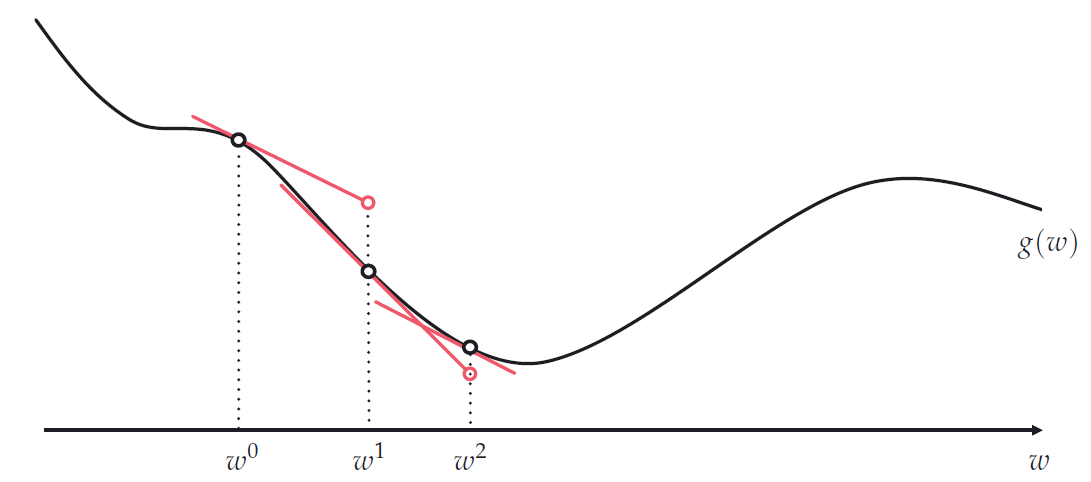

- Begin at the initial point $w^0$, we make an approximation to $g(w)$ at the point $(w^0,g(w^0))$ with the <font color='red'>first-order Taylor series approximation</font>.
- Moving in the negative gradient direction provided by this approximation we arrive at $w^1=w^0-\alpha\frac{d}{dw}g(w^0)$.
- Repeat this process at $w^1$, moving in the negative gradient direction to $w^2=w^1-\alpha\frac{d}{dw}g(w^1)$.
- $\ldots$

### Gradient Descent

- Gradient descent is better than naive zero-order approaches.

- The negative gradient direction provides a descent direction for the function locally.
- The descent directions provided via the gradients are easier to compute than seeking out a descent direction at random.

### The gradient descent algorithm

<hr style="height:1px;border:none;color:#555;background-color:#555;"/>
<p style="line-height: 1.7;">
<strong>1:</strong>&nbsp;&nbsp; <strong>input:</strong> function $g$, steplength $\alpha$, maximum number of steps $K$, and initial point $\mathbf{w}^0$ <br/>

<strong>2:</strong>&nbsp;&nbsp; <code>for</code> $\,\,k = 1...K$<br/>

<strong>3:</strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;         $\mathbf{w}^k = \mathbf{w}^{k-1} - \alpha \nabla g\left(\mathbf{w}^{k-1}\right)$ <br/>

<strong>4:</strong>&nbsp; <strong>output:</strong> history of weights $\left\{\mathbf{w}^{k}\right\}_{k=0}^K$ and corresponding function evaluations $\left\{g\left(\mathbf{w}^{k}\right)\right\}_{k=0}^K$ <br/>

<hr style="height:1px;border:none;color:#555;background-color:#555;"/>
</p>

- We can simply return the final set of weights $\mathbf{w}^K$ or the entire sequence of gradient descent steps $\left\{\mathbf{w}^{k}\right\}_{k=0}^K$.

- When does **gradient descent** stop?

- If the steplength $\alpha$ is chosen properly, the algorithm will stop near stationary points of the function, typically **minima** or **saddle points**.
- If the step
\begin{equation*}
\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} - \alpha \nabla g\left(\mathbf{w}^{k-1}\right)
\end{equation*}
does not move from the prior point  $\mathbf{w}^{\,k-1}$ then this can mean *that the direction we are traveling in is vanishing*, i.e., $-\nabla g\left(\mathbf{w}^k\right) \approx \mathbf{0}_{N\times 1}$. This is a stationary point of the function.

In [163]:
static_plotter = static_visualizer()
anim_plotter = anim_visualizer()

In [164]:
# # import automatic differentiator to compute gradient module
# from autograd import grad 

# # gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
# def gradient_descent(g,alpha,max_its,w):
#     # compute gradient module using autograd
#     gradient = grad(g)

#     # run the gradient descent loop
#     weight_history = [w]           # container for weight history
#     cost_history = [g(w)]          # container for corresponding cost function history
#     for k in range(max_its):
#         # evaluate the gradient, store current weights and cost function value
#         grad_eval = gradient(w)

#         # take gradient descent step
#         w = w - alpha*grad_eval
        
#         # record weight and cost
#         weight_history.append(w)
#         cost_history.append(g(w))
#     return weight_history,cost_history

In [165]:
video_path_1 = './video_1.mp4'

### Example 1: A convex single input example

Use gradient descent to minimize the polynomial function

\begin{equation*}
g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w\right).
\end{equation*}

The global minimum of the function is:
    
\begin{equation*}
w = \frac{\sqrt[\leftroot{-2}\uproot{2}3]{\sqrt[\leftroot{-2}\uproot{2}]{2031} - 45}}{6^{\frac{2}{3}}} - \frac{1}{\sqrt[\leftroot{-2}\uproot{2}3]{6\left(\sqrt{2031}-45\right)}}
\end{equation*}

With gradient descent we can determine a point that is close to this one. The gradient of the function is:
    
\begin{equation*}
\frac{\partial}{\partial w}g\left(w\right) = \frac{2}{25}w^3 + \frac{1}{25}w + \frac{1}{5}. 
\end{equation*}    

We initialize the gradient descent algorithm at $w^0=2.5$, constant steplength $\alpha=1$, and run for 25 iterations.

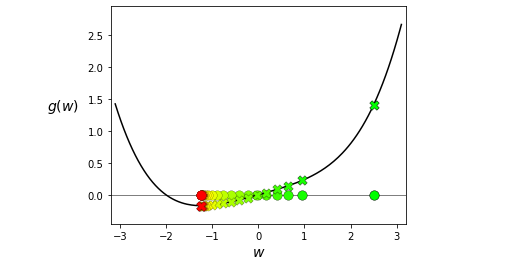

In [166]:
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   # try other functions too!  Like g = lambda w: np.cos(2*w) , g = lambda w: np.sin(5*w) + 0.1*w**2, g = lambda w: np.cos(5*w)*np.sin(w)
w = 2.5; alpha = 1; max_its = 25;
weight_history,cost_history = gradient_descent(g,alpha,max_its,w)
anim_plotter.gradient_descent(g,weight_history,savepath=video_path_1,fps=1)

In [167]:
# standard imports
import matplotlib.pyplot as plt
from IPython.display import Image, HTML
from base64 import b64encode
def show_video(video_path, width = 1000):
    video_file = open(video_path, "r+b").read()
    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    return HTML(f"""<video width={width} controls><source src="{video_url}"></video>""")

In [168]:
show_video(video_path_1, width=800)

### Example 2: A non-convex single input example

\begin{equation*}
g(w) = \text{sin}(3w) + 0.1w^2
\end{equation*}

- In order to find the global minimum of a function using gradient descent one may need to run it several times with different initializations and/or steplength schemes.

- We initialize two runs at $w^0 = 4.5$ and $w^0 = -1.5$.
- We use a fixed steplength of $\alpha=0.05$ for all 10 iterations.

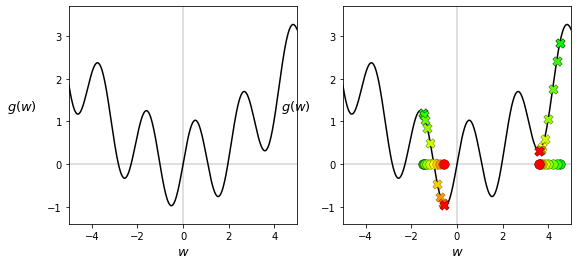

In [169]:
g = lambda w: np.sin(3*w) + 0.1*w**2
alpha = 0.05; w = 4.5; max_its = 10;
weight_history_1,cost_history_1 = gradient_descent(g,alpha,max_its,w)
alpha = 0.05; w = -1.5; max_its = 10;
weight_history_2,cost_history_2 = gradient_descent(g,alpha,max_its,w)
static_plotter.single_input_plot(g,[weight_history_1,weight_history_2],[cost_history_1,cost_history_2],wmin = -5,wmax = 5)

Depending on where we initialize, we may end up near a local or global minimum.

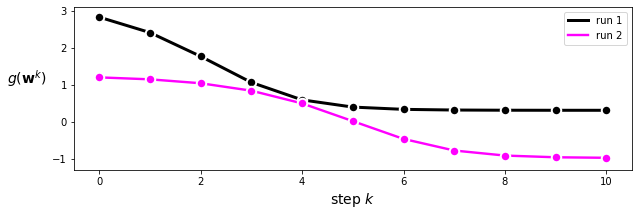

In [170]:
 static_plotter.plot_cost_histories([cost_history_1,cost_history_2],start = 0,points = True,labels = ['run 1','run 2'])

The cost function history plots can be used for debugging as well as selecting proper values for the steplength $\alpha$.

### Example 3: A convex multi-input example

\begin{equation*}
g(w_1,w_2) = w_1^2 + w_2^2 + 2
\end{equation*}

The gradient of the function is:
    
\begin{equation*}
\nabla g \left(\mathbf{w}\right) = 
\begin{bmatrix}
2w_1 \\
2w_2
\end{bmatrix}
\end{equation*}

We run gradient descent with 10 steps using the steplength/learning rate value $\alpha=0.1$ 

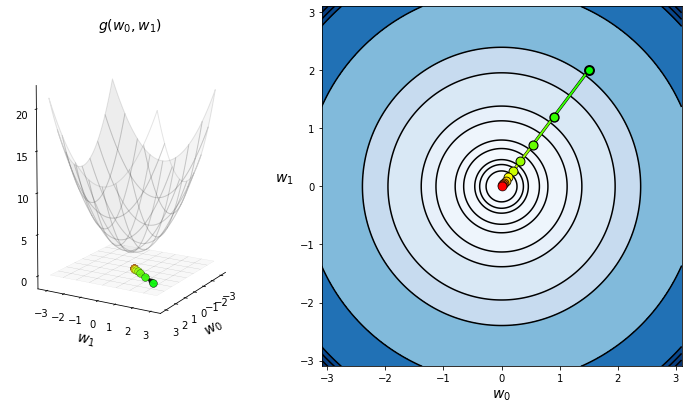

In [171]:
g = lambda w: np.dot(w.T,w) + 2
w = np.array([1.5,2]); max_its = 10; alpha = 0.2;
weight_history,cost_history = gradient_descent(g,alpha,max_its,w)
static_plotter.two_input_surface_contour_plot(g,weight_history,num_contours = 25,view = [10,30])

- We can plot the <font color='red'>cost function history plot</font>.

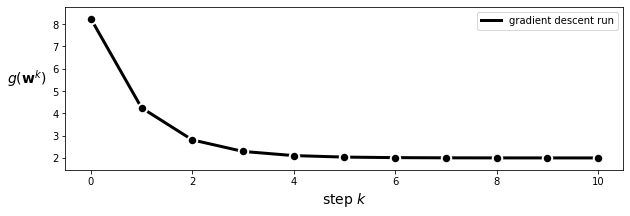

In [172]:
static_plotter.plot_cost_histories([cost_history],start = 0,points = True,labels = ['gradient descent run'])

- We can view the progress of the optimization run regardless of the dimension of the function wea re minimizing.

## Basic steplength choices for gradient descent

- We need to choose the steplength/learning rate parameter $\alpha$ carefully for gradient descent.

- Two most common choices are:
    1. Using a fixed $\alpha$ value for each step: $\alpha=10^{\gamma}$, where $\gamma$ is (often) an negative integer.
    2. Using a diminishing steplength, e.g., $\alpha=\frac{1}{k}$ at the $k^{th}$ step of a run.

- In general, we would like to choose the largest possible value for $\alpha$ that leads to proper convergence.

### Example: Fixed steplength selection for a single input convex function

\begin{equation*}
g(w) = w^2
\end{equation*}

In [173]:
demo_2d = grad_descent_visualizer_2d()
demo_3d = grad_descent_visualizer_3d()
video_path_2 = './video_2.mp4'

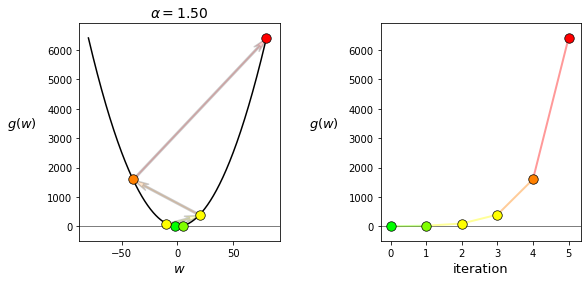

In [174]:
g = lambda w: w**2
w_init = -2.5
steplength_range = np.linspace(10**-5,1.5,150)
max_its = 5
demo_2d.animate_it(savepath=video_path_2,w_init = w_init, g = g, steplength_range = steplength_range,max_its = max_its,tracers = 'on',version = 'unnormalized',fps=10)

In [175]:
show_video(video_path_2, width=800)

### Example: Fixed steplength selection for a multi-input non-convex function

\begin{equation*}
g\left(w_1,w_2\right) = \text{sin}(w_1)
\end{equation*}

In [176]:
video_path_3 = './video_3.mp4'

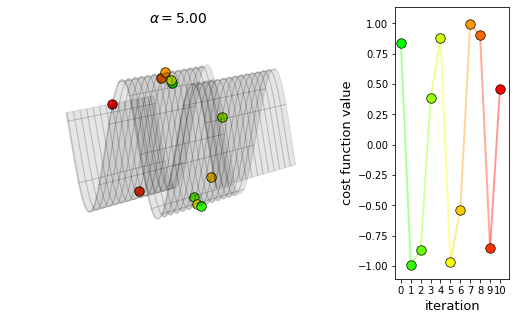

In [177]:
g = lambda w: np.sin(w[0])
w_init = [1,0]; alpha_range = np.linspace(2*10**-4,5,200); max_its = 10; view = [10,120];
demo_3d.animate_it(savepath=video_path_3,g = g,w_init = w_init,alpha_range = alpha_range,max_its = max_its,view = view,fps=10)

In [178]:
show_video(video_path_3, width=800)

### Example: Comparing fixed and diminishing steplengths for a single input convex function.


\begin{equation*}
g(w) = \left \vert w \right \vert.
\end{equation*}

This function has a single global minimum at $w = 0$ and a derivative defined (everywhere but at $w = 0$)

\begin{equation*}
\frac{\mathrm{d}}{\mathrm{d}w}g(w) = \begin{cases}
+1 \,\,\,\,\,\text{if} \,\, w > 0 \\
-1 \,\,\,\,\,\text{if} \,\, w < 0.
\end{cases}
\end{equation*}

We make two runs of 20 steps of gradient descent:
- Each is initialized at the point $w^0=2$ with a fixed steplength rule of $\alpha=0.5$
- Diminishing stepthlength rule: $\alpha = \frac{1}{k}$.

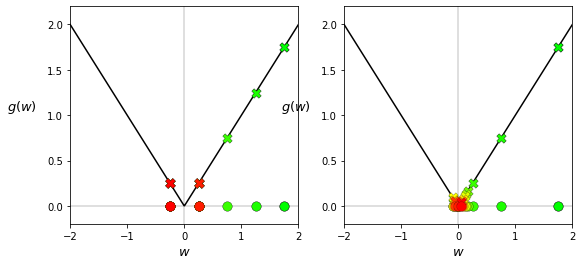

In [179]:
g = lambda w: np.abs(w)
alpha_choice = 0.5; w = 1.75; max_its = 20;
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)
alpha_choice = 'diminishing'; w = 1.75; max_its = 20;
weight_history_2,cost_history_2 =  gradient_descent(g,alpha_choice,max_its,w)
static_plotter.single_input_plot(g,[weight_history_1,weight_history_2],[cost_history_1,cost_history_2],wmin = -2,wmax = 2,onerun_perplot = True)

- A diminishing steplength is necessary to reach a point close to the minimum of the function.

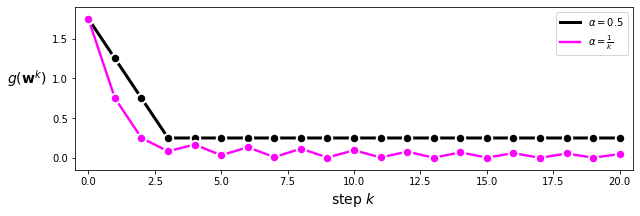

In [180]:
static_plotter.plot_cost_histories([cost_history_1,cost_history_2],start = 0,points = True,labels = [r'$\alpha = 0.5$',r'$\alpha = \frac{1}{k}$'])

## Oscillation in the cost function history plot: not always a bad thing

- We often use the **cost function history plot** to tune the steplength parameter $\alpha$.

- It is not ultimately important that the plot be strictly decreasing (i.e., the algorithm descends at every single step).
- It is critical to find a value of $\alpha$ that allows gradient descent to find the lowest possible function value.
- Sometimes, the best choice of $\alpha$ for a given minimization might cause gradient descent to move up and down.

### Example
Minimize the function:
\begin{equation*}
g\left(\mathbf{w}\right) = w_0^2 + w_1^2 + 2\,\text{sin}\left(1.5\left(w_0 + w_1\right)\right)^2 + 2
\end{equation*}    

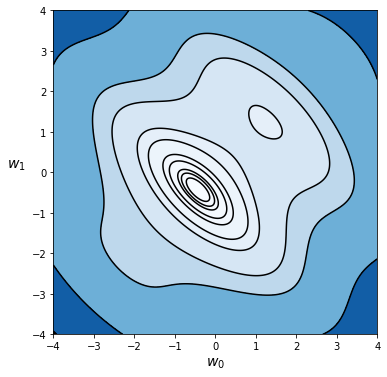

In [181]:
g = lambda w: w[0]**2 + w[1]**2 + 2*np.sin(1.5*(w[0] + w[1])) + 2
static_plotter.two_input_original_contour_plot(g,num_contours = 25,xmin = -4,xmax = 4, ymin = -4, ymax = 4)

- We run three runs start at the same initial point $\mathbf{w}^{0} = \begin{bmatrix} 3 \\ 3 \end{bmatrix}$ and take $10$ steps, and all three runs use a (different) fixed steplength.  the first run uses a fixed steplength of $\alpha = 10^{-2}$, the second run $\alpha = 10^{-1}$, and the third run $\alpha = 10^{0}$. 

In [182]:
# first run
w = np.array([3.0,3.0]); max_its = 10; 
alpha_choice = 10**(-2);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

# second run
alpha_choice = 10**(-1);
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w)

# third run
alpha_choice = 10**(0);
weight_history_3,cost_history_3 = gradient_descent(g,alpha_choice,max_its,w)

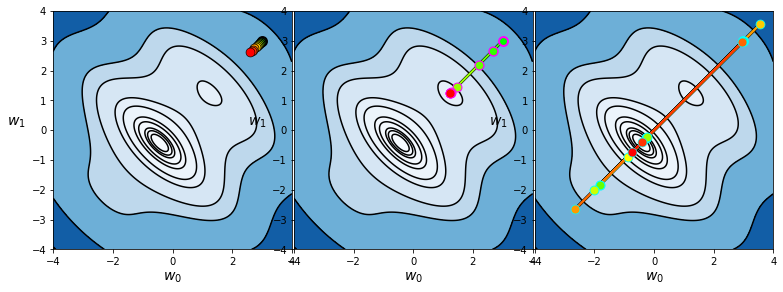

In [183]:
histories = [weight_history_1,weight_history_2,weight_history_3]
static_plotter.two_input_contour_horiz_plots(g,histories,show_original=False,num_contours=25,xmin=-4,xmax=4,ymin=-4,ymax=4)

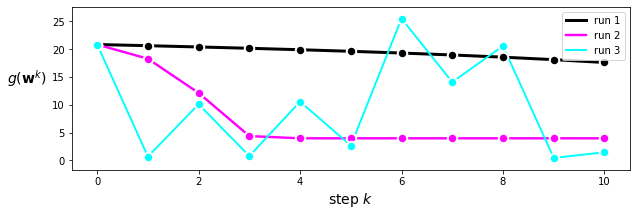

In [184]:
static_plotter.plot_cost_histories([cost_history_1,cost_history_2,cost_history_3],start = 0,points = True,labels = ['run 1','run 2', 'run 3'])

- For run 1, $\alpha=10^{-2}$ was too small.
- For run 2, $\alpha=10^{-1}$, the algorithm descends at each step, but converges to the **local minimum** near $\begin{bmatrix} 1.5 \\ 1.5 \end{bmatrix}$.
- For run 3, $\alpha=10^0$, the algorithm oscillates wildly, but reaches a point near the **global minimum** $\begin{bmatrix} -0.5 \\ -0.5 \end{bmatrix}$.

- This example was designed specifically for the demonstration purpose. However, in practice, it is just fine for the cost function history of gradient descent to osciallate up and down.

### Convergence behavior and steplength parameter selection

- When does gradient descent stop?

- If the steplength is chosen properly, the algorithm will halt near stationary points of a function, typically a minima or saddle points.
- If the step $\mathbf{w}^{\,k} = \mathbf{w}^{\,k-1} - \alpha \nabla g\left(\mathbf{w}^{k-1}\right)$ does not move from the prior point $\mathbf{w}^{\,k-1}$ significantly then this can mean only one thing: The direction we are traveling in is vanishing, i.e., $-\nabla g\left(\mathbf{w}^k\right) \approx \mathbf{0}_{N\times 1}$.


- We can wait for gradient descent to get sufficiently close to a stationary point, i.e., $\left\Vert \nabla g\left(\mathbf{w}^{\,k-1}\right)\right\Vert_2$ is sufficiently small. 
- Or when steps no longer make sufficient progress, i.e., $\frac{1}{N}\left\Vert \mathbf{w}^{\,k}-\mathbf{w}^{\,k-1}\right\Vert_2 < \epsilon$.
- Or when corresponding evaluations no longer differ substantially, $\frac{1}{N}\left\vert\, g(\mathbf{w}^{\,k})-g(\mathbf{w}^{\,k-1})\,\right\vert < \epsilon$.

- A practical way is to halt gradient descent is to simply run the algorithm for **a fixed number of maximum iterations**.
- This is typically set manually / heuristically depending on computing resources, domain knowledge, and the choice of the steplength parameter $\alpha$.

# Natural Weaknesses of Gradient Descent

In [185]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import gridspec
from IPython.display import clear_output
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform

from autograd import grad as compute_grad  
import autograd.numpy as np
import math


class static_visualizer:
    '''
    Illustrate a run of your preferred optimization algorithm on a one or two-input function.  Run
    the algorithm first, and input the resulting weight history into this wrapper.
    ''' 

    ##### draw picture of function and run for single-input function ####       
    def single_input_plot(self,g,weight_histories,cost_histories,**kwargs):        
        # adjust viewing range
        wmin = -3.1
        wmax = 3.1
        if 'wmin' in kwargs:            
            wmin = kwargs['wmin']
        if 'wmax' in kwargs:
            wmax = kwargs['wmax']
            
        onerun_perplot = False
        if 'onerun_perplot' in kwargs:
            onerun_perplot = kwargs['onerun_perplot']
            
        ### initialize figure
        fig = plt.figure(figsize = (9,4))
        artist = fig
        
        # remove whitespace from figure
        #fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        #fig.subplots_adjust(wspace=0.01,hspace=0.01)

        # create subplot with 2 panels, plot input function in center plot
        gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
        ax1 = plt.subplot(gs[0]); 
        ax2 = plt.subplot(gs[1]); 

        ### plot function in both panels
        w_plot = np.linspace(wmin,wmax,500)
        g_plot = g(w_plot)
        gmin = np.min(g_plot)
        gmax = np.max(g_plot)
        g_range = gmax - gmin
        ggap = g_range*0.1
        gmin -= ggap
        gmax += ggap
        
        # plot function, axes lines
        ax1.plot(w_plot,g_plot,color = 'k',zorder = 2)                           # plot function
        ax1.axhline(y=0, color='k',zorder = 1,linewidth = 0.25)
        ax1.axvline(x=0, color='k',zorder = 1,linewidth = 0.25)
        ax1.set_xlabel(r'$w$',fontsize = 13)
        ax1.set_ylabel(r'$g(w)$',fontsize = 13,rotation = 0,labelpad = 25)            
        ax1.set_xlim(wmin,wmax)
        ax1.set_ylim(gmin,gmax)
        
        ax2.plot(w_plot,g_plot,color = 'k',zorder = 2)                           # plot function
        ax2.axhline(y=0, color='k',zorder = 1,linewidth = 0.25)
        ax2.axvline(x=0, color='k',zorder = 1,linewidth = 0.25)
        ax2.set_xlabel(r'$w$',fontsize = 13)
        ax2.set_ylabel(r'$g(w)$',fontsize = 13,rotation = 0,labelpad = 25)   
        ax2.set_xlim(wmin,wmax)
        ax2.set_ylim(gmin,gmax)        
       
        #### loop over histories and plot each
        for j in range(len(weight_histories)):
            w_hist = weight_histories[j]
            c_hist = cost_histories[j]
            
            # colors for points --> green as the algorithm begins, yellow as it converges, red at final point
            s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
            s.shape = (len(s),1)
            t = np.ones(len(w_hist[round(len(w_hist)/2):]))
            t.shape = (len(t),1)
            s = np.vstack((s,t))
            self.colorspec = []
            self.colorspec = np.concatenate((s,np.flipud(s)),1)
            self.colorspec = np.concatenate((self.colorspec,np.zeros((len(s),1))),1)
            
            ### plot all history points
            ax = ax2
            if onerun_perplot == True:
                if j == 0:
                    ax = ax1
                if j == 1:
                    ax = ax2
            for k in range(len(w_hist)):
                # pick out current weight and function value from history, then plot
                w_val = w_hist[k]
                g_val = c_hist[k]
                ax.scatter(w_val,g_val,s = 90,color = self.colorspec[k],edgecolor = 'k',linewidth = 0.5*((1/(float(k) + 1)))**(0.4),zorder = 3,marker = 'X')            # evaluation on function
                ax.scatter(w_val,0,s = 90,facecolor = self.colorspec[k],edgecolor = 'k',linewidth = 0.5*((1/(float(k) + 1)))**(0.4), zorder = 3)

    ##### draw picture of function and run for two-input function ####       
    def two_input_surface_contour_plot(self,g,w_hist,**kwargs):
        ### input arguments ###        
        num_contours = 10
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']
           
        view = [20,20]
        if 'view' in kwargs:
            view = kwargs['view']
            
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (11,5))
        self.edgecolor = 'k'

        # create subplot with 3 panels, plot input function in center plot
        # this seems to be the best option for whitespace management when using
        # both a surface and contour plot in the same figure
        gs = gridspec.GridSpec(1, 3, width_ratios=[1,5,10]) 
        ax1 = plt.subplot(gs[1],projection='3d'); 
        ax2 = plt.subplot(gs[2],aspect='equal'); 
        
        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        # plot 3d surface and path in left panel
        self.draw_surface(g,ax1,**kwargs)
        self.show_inputspace_path(w_hist,ax1)
        ax1.view_init(view[0],view[1])
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax2,**kwargs)  # draw contour plot
        self.draw_weight_path(ax2,w_hist)              # draw path on contour plot

        # plot
        plt.show()
 

    ##### draw picture of function and run for two-input function ####       
    def two_input_contour_plot(self,g,w_hist,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,4.5))
        
        # show original contour function as well?
        show_original = True
        if 'show_original' in kwargs:
            show_original = kwargs['show_original']

        # create figure with single plot for contour
        gs = gridspec.GridSpec(1, 2) 
        ax1 = plt.subplot(gs[0],aspect='equal'); 
        ax2 = plt.subplot(gs[1],aspect='equal'); 
        
        if show_original == False:
            gs = gridspec.GridSpec(1, 1) 
            ax2 = plt.subplot(gs[0],aspect='equal'); 

        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        self.contour_plot_setup(g,ax2,**kwargs)  # draw contour plot
        self.edgecolor = 'k'
        self.draw_weight_path(ax2,w_hist,**kwargs)        # draw path on contour plot
        
        if show_original == True:
            self.contour_plot_setup(g,ax1,**kwargs)  # draw contour plot

        # plot
        plt.show()
 

    ##### draw picture of function and run for two-input function ####       
    def two_input_contour_vert_plots(self,gs,histories,**kwargs):
        ##### construct figure with panels #####
        # construct figure
        fig = plt.figure(figsize = (10,7))

        # create figure with single plot for contour
        num_plots = len(histories)
        axs = gridspec.GridSpec(num_plots,1) 
        
        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
        
        # define edgecolors 
        edgecolors = ['k','k','k','k','k']
        
        # loop over histories and plot
        for j in range(num_plots):
            # get next weight history
            w_hist = histories[j]
            g = gs[j]
            
            # create subplot
            ax = plt.subplot(axs[j],aspect='equal'); 

            ### make contour right plot - as well as horizontal and vertical axes ###
            self.contour_plot_setup(g,ax,**kwargs)           # draw contour plot
            self.edgecolor = edgecolors[j]
            self.draw_weight_path(ax,w_hist,**kwargs)        # draw path on contour plot

        # plot
        plt.show()
        
 
        
    # compare cost histories from multiple runs
    def plot_cost_histories(self,histories,start,**kwargs):
        # plotting colors
        colors = ['k','magenta','aqua','blueviolet','chocolate']
        
        # initialize figure
        fig = plt.figure(figsize = (10,3))

        # create subplot with 1 panel
        gs = gridspec.GridSpec(1, 1) 
        ax = plt.subplot(gs[0]); 
        
        # any labels to add?        
        labels = [' ',' ']
        if 'labels' in kwargs:
            labels = kwargs['labels']
            
        # plot points on cost function plot too?
        points = False
        if 'points' in kwargs:
            points = kwargs['points']

        # run through input histories, plotting each beginning at 'start' iteration
        for c in range(len(histories)):
            history = histories[c]
            #label = 0
            label = labels[c]
            #if c == 0:
            #    label = labels[0]
            #else:
            #    label = labels[1]
                
            # check if a label exists, if so add it to the plot
            if np.size(label) == 0:
                ax.plot(np.arange(start,len(history),1),history[start:],linewidth = 3*(0.8)**(c),color = colors[c]) 
            else:               
                ax.plot(np.arange(start,len(history),1),history[start:],linewidth = 3*(0.8)**(c),color = colors[c],label = label) 
                
            # check if points should be plotted for visualization purposes
            if points == True:
                ax.scatter(np.arange(start,len(history),1),history[start:],s = 90,color = colors[c],edgecolor = 'w',linewidth = 2,zorder = 3) 


        # clean up panel
        xlabel = 'step $k$'
        if 'xlabel' in kwargs:
            xlabel = kwargs['xlabel']
        ylabel = r'$g\left(\mathbf{w}^k\right)$'
        if 'ylabel' in kwargs:
            ylabel = kwargs['ylabel']
        ax.set_xlabel(xlabel,fontsize = 14)
        ax.set_ylabel(ylabel,fontsize = 14,rotation = 0,labelpad = 25)
        if np.size(label) > 0:
            anchor = (1,1)
            if 'anchor' in kwargs:
                anchor = kwargs['anchor']
            plt.legend(loc='upper right', bbox_to_anchor=anchor)
            #leg = ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

        ax.set_xlim([start - 0.5,len(history) - 0.5])
        
       # fig.tight_layout()
        plt.show()

    # get directions good
    def plot_grad_directions_v2(self,history,**kwargs):
        # loop over histories and plot grad directions
        num_grads = np.minimum(len(history),9)
       
        # construct figure
        fig = plt.figure(figsize = (6,6))

        # remove whitespace from figure
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        fig.subplots_adjust(wspace=0.01,hspace=0.01)
            
        # create figure with single plot for contour
        axs = gridspec.GridSpec(3,3) 
        
        # create directions out of weight history
        directions = []
        for i in range(len(history) - 1):
            w_old = history[i]
            w_new = history[i+1]

            # form direction 
            direction = w_new - w_old

            # normalize
            direction /= np.sqrt(np.sum([r**2 for r in direction]))

            # store 
            directions.append(direction)
        
        # plot directions as arrows
        self.colorspec = self.make_colorspec(directions[:num_grads+1])
        for j in range(num_grads):
            ax = plt.subplot(axs[j],aspect='equal'); 
            self.draw_grads_v2(ax,directions[:j+1],**kwargs)        # draw path on contour plot

            # set viewlimits
            ax.set_xlim([-1.25,1.25])
            ax.set_ylim([-1.25,1.25])
            
            # set title
            title = 'step ' + str(j+1) + ' direction'
            ax.set_title(title)

        # plot
        plt.show()
        
    ########################################################################################
    #### utility functions - for setting up / making contour plots, 3d surface plots, etc., ####
    # show contour plot of input function
    def contour_plot_setup(self,g,ax,**kwargs):
        xmin = -3.1
        xmax = 3.1
        ymin = -3.1
        ymax = 3.1
        if 'xmin' in kwargs:            
            xmin = kwargs['xmin']
        if 'xmax' in kwargs:
            xmax = kwargs['xmax']
        if 'ymin' in kwargs:            
            ymin = kwargs['ymin']
        if 'ymax' in kwargs:
            ymax = kwargs['ymax']      
        num_contours = 20
        if 'num_contours' in kwargs:
            num_contours = kwargs['num_contours']   
            
        # choose viewing range using weight history?
        if 'view_by_weights' in kwargs:
            view_by_weights = True
            weight_history = kwargs['weight_history']
            if view_by_weights == True:
                xmin = min([v[0] for v in weight_history])[0]
                xmax = max([v[0] for v in weight_history])[0]
                xgap = (xmax - xmin)*0.25
                xmin -= xgap
                xmax += xgap

                ymin = min([v[1] for v in weight_history])[0]
                ymax = max([v[1] for v in weight_history])[0]
                ygap = (ymax - ymin)*0.25
                ymin -= ygap
                ymax += ygap
 
        ### plot function as contours ###
        self.draw_contour_plot(g,ax,num_contours,xmin,xmax,ymin,ymax)
        
        ### cleanup panel ###
        ax.set_xlabel('$w_0$',fontsize = 14)
        ax.set_ylabel('$w_1$',fontsize = 14,labelpad = 15,rotation = 0)
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        # ax.set_xticks(np.arange(round(xmin),round(xmax)+1))
        # ax.set_yticks(np.arange(round(ymin),round(ymax)+1))
        
        # set viewing limits
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)

    ### function for creating contour plot
    def draw_contour_plot(self,g,ax,num_contours,xmin,xmax,ymin,ymax):
        #### define input space for function and evaluate ####
        w1 = np.linspace(xmin,xmax,400)
        w2 = np.linspace(ymin,ymax,400)
        w1_vals, w2_vals = np.meshgrid(w1,w2)
        w1_vals.shape = (len(w1)**2,1)
        w2_vals.shape = (len(w2)**2,1)
        h = np.concatenate((w1_vals,w2_vals),axis=1)
        func_vals = np.asarray([ g(np.reshape(s,(2,1))) for s in h])

        w1_vals.shape = (len(w1),len(w1))
        w2_vals.shape = (len(w2),len(w2))
        func_vals.shape = (len(w1),len(w2)) 
        
        ### make contour right plot - as well as horizontal and vertical axes ###
        # set level ridges
        levelmin = min(func_vals.flatten())
        levelmax = max(func_vals.flatten())
        cutoff = 1
        cutoff = (levelmax - levelmin)*cutoff
        numper = 4
        levels1 = np.linspace(cutoff,levelmax,numper)
        num_contours -= numper

        # produce generic contours
        levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
        levels = np.unique(np.append(levels1,levels2))
        num_contours -= numper
        while num_contours > 0:
            cutoff = levels[1]
            levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
            levels = np.unique(np.append(levels2,levels))
            num_contours -= numper
   
        # plot the contours
        ax.contour(w1_vals, w2_vals, func_vals,levels = levels[1:],colors = 'k')
        ax.contourf(w1_vals, w2_vals, func_vals,levels = levels,cmap = 'Blues')

        ###### clean up plot ######
        ax.set_xlabel('$w_0$',fontsize = 12)
        ax.set_ylabel('$w_1$',fontsize = 12,rotation = 0)
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        
        
    ### makes color spectrum for plotted run points - from green (start) to red (stop)
    def make_colorspec(self,w_hist):
        # make color range for path
        s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
        s.shape = (len(s),1)
        t = np.ones(len(w_hist[round(len(w_hist)/2):]))
        t.shape = (len(t),1)
        s = np.vstack((s,t))
        colorspec = []
        colorspec = np.concatenate((s,np.flipud(s)),1)
        colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)
        return colorspec


    ### function for drawing weight history path
    def draw_grads(self,ax,directions,**kwargs):
        # make colors for plot
        colorspec = self.make_colorspec(directions)

        arrows = True
        if 'arrows' in kwargs:
            arrows = kwargs['arrows']
            
        # plot axes
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        
        ### plot function decrease plot in right panel
        for j in range(len(directions)):  
            # get current direction
            direction = directions[j]
            
            # draw arrows connecting pairwise points
            head_length = 0.1
            head_width = 0.1
            ax.arrow(0,0,direction[0],direction[1], head_width=head_width, head_length=head_length, fc='k', ec='k',linewidth=1,zorder = 2,length_includes_head=True)
            ax.arrow(0,0,direction[0],direction[1], head_width=0.1, head_length=head_length, fc=colorspec[j], ec=colorspec[j],linewidth=0.25,zorder = 2,length_includes_head=True)

    ### function for drawing weight history path
    def draw_grads_v2(self,ax,directions,**kwargs):
        arrows = True
        if 'arrows' in kwargs:
            arrows = kwargs['arrows']
            
        # plot axes
        ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
        ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)
        
        ### plot function decrease plot in right panel
        head_length = 0.1
        head_width = 0.1
        alpha = 0.1
        for j in range(len(directions)-1):  
            # get current direction
            direction = directions[j]
            
            # draw arrows connecting pairwise points
            ax.arrow(0,0,direction[0],direction[1], head_width=head_width, head_length=head_length, fc='k', ec='k',linewidth=3.5,zorder = 2,length_includes_head=True,alpha = alpha)
            ax.arrow(0,0,direction[0],direction[1], head_width=0.1, head_length=head_length, fc=self.colorspec[j], ec=self.colorspec[j],linewidth=3,zorder = 2,length_includes_head=True,alpha = alpha)
            
        # plot most recent direction
        direction = directions[-1]
        num_dirs = len(directions)
  
        # draw arrows connecting pairwise points
        ax.arrow(0,0,direction[0],direction[1], head_width=head_width, head_length=head_length, fc='k', ec='k',linewidth=4,zorder = 2,length_includes_head=True)
        ax.arrow(0,0,direction[0],direction[1], head_width=0.1, head_length=head_length, fc=self.colorspec[num_dirs], ec=self.colorspec[num_dirs],linewidth=3,zorder = 2,length_includes_head=True)            
            
    ### function for drawing weight history path
    def draw_weight_path(self,ax,w_hist,**kwargs):
        # make colors for plot
        colorspec = self.make_colorspec(w_hist)
        
        arrows = True
        if 'arrows' in kwargs:
            arrows = kwargs['arrows']

        ### plot function decrease plot in right panel
        for j in range(len(w_hist)):  
            w_val = w_hist[j]

            # plot each weight set as a point
            ax.scatter(w_val[0],w_val[1],s = 80,color = colorspec[j],edgecolor = self.edgecolor,linewidth = 2*math.sqrt((1/(float(j) + 1))),zorder = 3)

            # plot connector between points for visualization purposes
            if j > 0:
                pt1 = w_hist[j-1]
                pt2 = w_hist[j]
                
                # produce scalar for arrow head length
                pt_length = np.linalg.norm(pt1 - pt2)
                head_length = 0.1
                alpha = (head_length - 0.35)/pt_length + 1
                
                # if points are different draw error
                if np.linalg.norm(pt1 - pt2) > head_length and arrows == True:
                    if np.ndim(pt1) > 1:
                        pt1 = pt1.flatten()
                        pt2 = pt2.flatten()
                        
                        
                    # draw color connectors for visualization
                    w_old = pt1
                    w_new = pt2
                    ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = colorspec[j],linewidth = 2,alpha = 1,zorder = 2)      # plot approx
                    ax.plot([w_old[0],w_new[0]],[w_old[1],w_new[1]],color = 'k',linewidth = 3,alpha = 1,zorder = 1)      # plot approx
                
                
                    # draw arrows connecting pairwise points
                    #ax.arrow(pt1[0],pt1[1],(pt2[0] - pt1[0])*alpha,(pt2[1] - pt1[1])*alpha, head_width=0.1, head_length=head_length, fc='k', ec='k',linewidth=4,zorder = 2,length_includes_head=True)
                    #ax.arrow(pt1[0],pt1[1],(pt2[0] - pt1[0])*alpha,(pt2[1] - pt1[1])*alpha, head_width=0.1, head_length=head_length, fc='w', ec='w',linewidth=0.25,zorder = 2,length_includes_head=True)
        
    ### draw surface plot
    def draw_surface(self,g,ax,**kwargs):
        xmin = -3.1
        xmax = 3.1
        ymin = -3.1
        ymax = 3.1
        if 'xmin' in kwargs:            
            xmin = kwargs['xmin']
        if 'xmax' in kwargs:
            xmax = kwargs['xmax']
        if 'ymin' in kwargs:            
            ymin = kwargs['ymin']
        if 'ymax' in kwargs:
            ymax = kwargs['ymax']   
            
        #### define input space for function and evaluate ####
        w1 = np.linspace(xmin,xmax,200)
        w2 = np.linspace(ymin,ymax,200)
        w1_vals, w2_vals = np.meshgrid(w1,w2)
        w1_vals.shape = (len(w1)**2,1)
        w2_vals.shape = (len(w2)**2,1)
        h = np.concatenate((w1_vals,w2_vals),axis=1)
        func_vals = np.asarray([g(np.reshape(s,(2,1))) for s in h])

        ### plot function as surface ### 
        w1_vals.shape = (len(w1),len(w2))
        w2_vals.shape = (len(w1),len(w2))
        func_vals.shape = (len(w1),len(w2))
        ax.plot_surface(w1_vals, w2_vals, func_vals, alpha = 0.1,color = 'w',rstride=25, cstride=25,linewidth=1,edgecolor = 'k',zorder = 2)

        # plot z=0 plane 
        ax.plot_surface(w1_vals, w2_vals, func_vals*0, alpha = 0.1,color = 'w',zorder = 1,rstride=25, cstride=25,linewidth=0.3,edgecolor = 'k') 
                
        # clean up axis
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False

        ax.xaxis.pane.set_edgecolor('white')
        ax.yaxis.pane.set_edgecolor('white')
        ax.zaxis.pane.set_edgecolor('white')

        ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        
        ax.set_xlabel('$w_0$',fontsize = 14)
        ax.set_ylabel('$w_1$',fontsize = 14,rotation = 0)
        ax.set_title('$g(w_0,w_1)$',fontsize = 14)
        

    ### plot points and connectors in input space in 3d plot        
    def show_inputspace_path(self,w_hist,ax):
        # make colors for plot
        colorspec = self.make_colorspec(w_hist)
        
        for k in range(len(w_hist)):
            pt1 = w_hist[k]
            ax.scatter(pt1[0],pt1[1],0,s = 60,color = colorspec[k],edgecolor = 'k',linewidth = 0.5*math.sqrt((1/(float(k) + 1))),zorder = 3)
            if k < len(w_hist)-1:
                pt2 = w_hist[k+1]
                if np.linalg.norm(pt1 - pt2) > 10**(-3):
                    # draw arrow in left plot
                    a = Arrow3D([pt1[0],pt2[0]], [pt1[1],pt2[1]], [0, 0], mutation_scale=10, lw=2, arrowstyle="-|>", color="k")
                    ax.add_artist(a)
        
#### custom 3d arrow and annotator functions ###    
# nice arrow maker from https://stackoverflow.com/questions/11140163/python-matplotlib-plotting-a-3d-cube-a-sphere-and-a-vector
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)




'''
This method visualizes the contours of a function taking in two inputs.  Then for a set of input points
the gradient is computed (at each point) and drawn as an arrow on top of the contour plot
'''

def rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]]).T
    
def illustrate_gradients(g,pts,**kwargs):   
    # user defined args
    pts_max = np.max(np.max(pts)) + 3
    viewmax = max(3,pts_max)
    colors = ['lime','magenta','orangered']

    if 'viewmax' in kwargs:
        viewmax = kwargs['viewmax']

    num_contours = 15
    if 'num_contours' in kwargs:
        num_contours = kwargs['num_contours']  
        
    ##### setup figure to plot #####
    # initialize figure
    fig = plt.figure(figsize = (8,4))

    # create subplot with 3 panels, plot input function in center plot
    gs = gridspec.GridSpec(1, 3, width_ratios=[1,5,1]) 
    ax1 = plt.subplot(gs[0]); ax1.axis('off')
    ax2 = plt.subplot(gs[1]); ax2.set_aspect('equal')
    ax3 = plt.subplot(gs[2]); ax3.axis('off')

    ### compute gradient of input function ###
    nabla_g = compute_grad(g)
    
    # loop over points and determine levels
    num_pts = pts.shape[1]
    levels = []
    for t in range(num_pts):
        pt = pts[:,t]
        g_val = g(pt)
        levels.append(g_val)
    levels = np.array(levels)
    inds =  np.argsort(levels, axis=None)
    pts = pts[:,inds]
    levels = levels[inds]    
    
    # evaluate all input points through gradient function
    grad_pts = []
    num_pts = pts.shape[1]
    for t in range(num_pts):
        # point
        color = colors[t]
        pt = pts[:,t]
        nabla_pt = nabla_g(pt)
        nabla_pt /= np.linalg.norm(nabla_pt)
        
        # plot original points
        ax2.scatter(pt[0],pt[1],s = 80,color = color,edgecolor = 'k',linewidth = 2,zorder = 3)

        ### draw 2d arrow in right plot ###
        # create gradient vector
        grad_pt = pt - nabla_pt
        
        # plot gradient direction
        scale = 0.3
        arrow_pt = (grad_pt - pt)*0.78*viewmax*scale
        ax2.arrow(pt[0],pt[1],arrow_pt[0],arrow_pt[1], head_width=0.1, head_length=0.1, fc='k', ec='k',linewidth=4,zorder = 2,length_includes_head=True)
        ax2.arrow(pt[0],pt[1],arrow_pt[0],arrow_pt[1], head_width=0.1, head_length=0.1, fc=color, ec=color,linewidth=2.75,zorder = 2,length_includes_head=True)
        
        ### compute orthogonal line to contour ###
        # compute slope of gradient direction
        slope = float(arrow_pt[1])/float(arrow_pt[0])
        perp_slope = -1/slope
        perp_inter = pt[1] - perp_slope*pt[0]        
        
        # find points on orthog line approx 'scale' away in both directions (lazy quadratic formula)
        scale = 1.5
        s = np.linspace(pt[0] - 5, pt[0] + 5,1000)
        y2 = perp_slope*s + perp_inter
        dists = np.abs(((s - pt[0])**2 + (y2 - pt[1])**2)**0.5 - scale)
        ind = np.argmin(dists)
        x2 = s[ind]
    
        # plot tangent line to contour
        if x2 < pt[0]:
            s = np.linspace(x2,pt[0] + abs(x2 - pt[0]),200)
        else:
            s = np.linspace(pt[0] - abs(x2 - pt[0]),x2,200)

        v = perp_slope*s + perp_inter
        ax2.plot(s,v,zorder = 2,color = 'k',linewidth = 3)
        ax2.plot(s,v,zorder = 2,color = colors[t],linewidth = 1)
        
    # generate viewing range 
    contour_plot(ax2,g,pts,viewmax,num_contours,colors,levels)
    plt.show()

### visualize contour plot of cost function ###
def contour_plot(ax,g,pts,wmax,num_contours,my_colors,pts_levels):
    #### define input space for function and evaluate ####
    w1 = np.linspace(-wmax,wmax,100)
    w2 = np.linspace(-wmax,wmax,100)
    w1_vals, w2_vals = np.meshgrid(w1,w2)
    w1_vals.shape = (len(w1)**2,1)
    w2_vals.shape = (len(w2)**2,1)
    h = np.concatenate((w1_vals,w2_vals),axis=1)
    func_vals = np.asarray([g(s) for s in h])
    w1_vals.shape = (len(w1),len(w1))
    w2_vals.shape = (len(w2),len(w2))
    func_vals.shape = (len(w1),len(w2)) 

    ### make contour right plot - as well as horizontal and vertical axes ###
    # set level ridges
    levelmin = min(func_vals.flatten())
    levelmax = max(func_vals.flatten())
    cutoff = 0.3
    cutoff = (levelmax - levelmin)*cutoff
    numper = 3
    levels1 = np.linspace(cutoff,levelmax,numper)
    num_contours -= numper

    ##### plot filled contours with generic contour lines #####
    # produce generic contours
    levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
    levels = np.unique(np.append(levels1,levels2))
    num_contours -= numper
    while num_contours > 0:
        cutoff = levels[1]
        levels2 = np.linspace(levelmin,cutoff,min(num_contours,numper))
        levels = np.unique(np.append(levels2,levels))
        num_contours -= numper
    
    # plot the contours
    ax.contour(w1_vals, w2_vals, func_vals,levels = levels[1:],colors = 'k')
    ax.contourf(w1_vals, w2_vals, func_vals,levels = levels,cmap = 'Blues')
    
    ###### add contour curves based on input points #####
    # add to this list the contours passing through input points
    ax.contour(w1_vals, w2_vals, func_vals,levels = pts_levels,colors = 'k',linewidths = 3)
    ax.contour(w1_vals, w2_vals, func_vals,levels = pts_levels,colors = my_colors, linewidths = 2.5)

    ###### clean up plot ######
    ax.set_xlabel('$w_0$',fontsize = 12)
    ax.set_ylabel('$w_1$',fontsize = 12,rotation = 0)
    ax.axhline(y=0, color='k',zorder = 0,linewidth = 0.5)
    ax.axvline(x=0, color='k',zorder = 0,linewidth = 0.5)


class grad_descent_visualizer:
    '''
    Illustrate gradient descent, Newton method, and Secant method for minimizing an input function, illustrating
    surrogate functions at each step.  A custom slider mechanism is used to progress each algorithm, and points are
    colored from green at the start of an algorithm, to yellow as it converges, and red as the final point.
    ''' 
     
    ######## gradient descent ########
    # run gradient descent 
    def run_gradient_descent(self):
        w = self.w_init
        self.w_hist = []
        self.w_hist.append(w)
        w_old = np.inf
        j = 0
        for j in range(int(self.max_its)):
            # update old w and index
            w_old = w
            
            # plug in value into func and derivative
            grad_eval = self.grad(w)
            
            # normalized or unnormalized?
            if self.version == 'normalized':
                grad_norm = np.linalg.norm(grad_eval)
                if grad_norm == 0:
                    grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
                grad_eval /= grad_norm
                
           # check if diminishing steplength rule used
            alpha = 0
            if self.steplength == 'diminishing':
                alpha = 1/(1 + j)
            else:
                alpha = float(self.steplength)            
            
            # take gradient descent step
            w = w - alpha*grad_eval
            
            # record
            self.w_hist.append(w)
          
 
    ##### draw still image of gradient descent on single-input function ####       
    def draw_2d(self,**kwargs):
        self.g = kwargs['g']                            # input function
        self.grad = compute_grad(self.g)              # gradient of input function
        self.w_init =float( -2)                       # user-defined initial point (adjustable when calling each algorithm)
        self.alpha = 10**-4                           # user-defined step length for gradient descent (adjustable when calling gradient descent)
        self.max_its = 20                             # max iterations to run for each algorithm
        self.w_hist = []                              # container for algorithm path
        
        wmin = -3.1
        wmax = 3.1
        if 'wmin' in kwargs:            
            wmin = kwargs['wmin']
        if 'wmax' in kwargs:
            wmax = kwargs['wmax']
        
        # get new initial point if desired
        if 'w_inits' in kwargs:
            self.w_inits = kwargs['w_inits']
            self.w_inits = [float(s) for s in self.w_inits]
            
        # take in user defined step length
        if 'steplength' in kwargs:
            self.steplength = kwargs['steplength']
            
        # take in user defined maximum number of iterations
        if 'max_its' in kwargs:
            self.max_its = float(kwargs['max_its'])
            
        # version of gradient descent to use (normalized or unnormalized)
        self.version = 'unnormalized'
        if 'version' in kwargs:
            self.version = kwargs['version']
            
        # initialize figure
        fig = plt.figure(figsize = (9,4))
        artist = fig
        
        # remove whitespace from figure
        #fig.subplots_adjust(left=0, right=1, bottom=0, top=1) # remove whitespace
        #fig.subplots_adjust(wspace=0.01,hspace=0.01)

        # create subplot with 2 panels, plot input function in center plot
        gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 

        ax1 = plt.subplot(gs[0]); 
        ax2 = plt.subplot(gs[1]); 

        # generate function for plotting on each slide
        w_plot = np.linspace(wmin,wmax,500)
        g_plot = self.g(w_plot)
        g_range = max(g_plot) - min(g_plot)
        ggap = g_range*0.1
        width = 30
       
        #### loop over all initializations, run gradient descent algorithm for each and plot results ###
        for j in range(len(self.w_inits)):
            # get next initialization
            self.w_init = self.w_inits[j]
            
            # run grad descent for this init
            self.w_hist = []
            self.run_gradient_descent()
        
            # colors for points --> green as the algorithm begins, yellow as it converges, red at final point
            s = np.linspace(0,1,len(self.w_hist[:round(len(self.w_hist)/2)]))
            s.shape = (len(s),1)
            t = np.ones(len(self.w_hist[round(len(self.w_hist)/2):]))
            t.shape = (len(t),1)
            s = np.vstack((s,t))
            self.colorspec = []
            self.colorspec = np.concatenate((s,np.flipud(s)),1)
            self.colorspec = np.concatenate((self.colorspec,np.zeros((len(s),1))),1)
        
            # plot function, axes lines
            ax1.plot(w_plot,g_plot,color = 'k',zorder = 2)                           # plot function
            ax1.axhline(y=0, color='k',zorder = 1,linewidth = 0.25)
            ax1.axvline(x=0, color='k',zorder = 1,linewidth = 0.25)
            ax1.set_xlabel(r'$w$',fontsize = 13)
            ax1.set_ylabel(r'$g(w)$',fontsize = 13,rotation = 0,labelpad = 25)            
            
            ax2.plot(w_plot,g_plot,color = 'k',zorder = 2)                           # plot function
            ax2.axhline(y=0, color='k',zorder = 1,linewidth = 0.25)
            ax2.axvline(x=0, color='k',zorder = 1,linewidth = 0.25)
            ax2.set_xlabel(r'$w$',fontsize = 13)
            ax2.set_ylabel(r'$g(w)$',fontsize = 13,rotation = 0,labelpad = 25)            
            
            ### plot all gradient descent points ###
            for k in range(len(self.w_hist)):
                # pick out current weight and function value from history, then plot
                w_val = self.w_hist[k]
                g_val = self.g(w_val)
            
                ax2.scatter(w_val,g_val,s = 90,color = self.colorspec[k],edgecolor = 'k',linewidth = 0.5*((1/(float(k) + 1)))**(0.4),zorder = 3,marker = 'X')            # evaluation on function
                ax2.scatter(w_val,0,s = 90,facecolor = self.colorspec[k],edgecolor = 'k',linewidth = 0.5*((1/(float(k) + 1)))**(0.4), zorder = 3)
                    

In [186]:
static_plotter = static_visualizer()
demo = grad_descent_visualizer()

###  Natural Weaknesses of Gradient Descent
- Gradient descent is a local optimization method that employs the **negative gradient** at each step.

- The negative gradient direction is a true descent direction and is often cheap to compute.

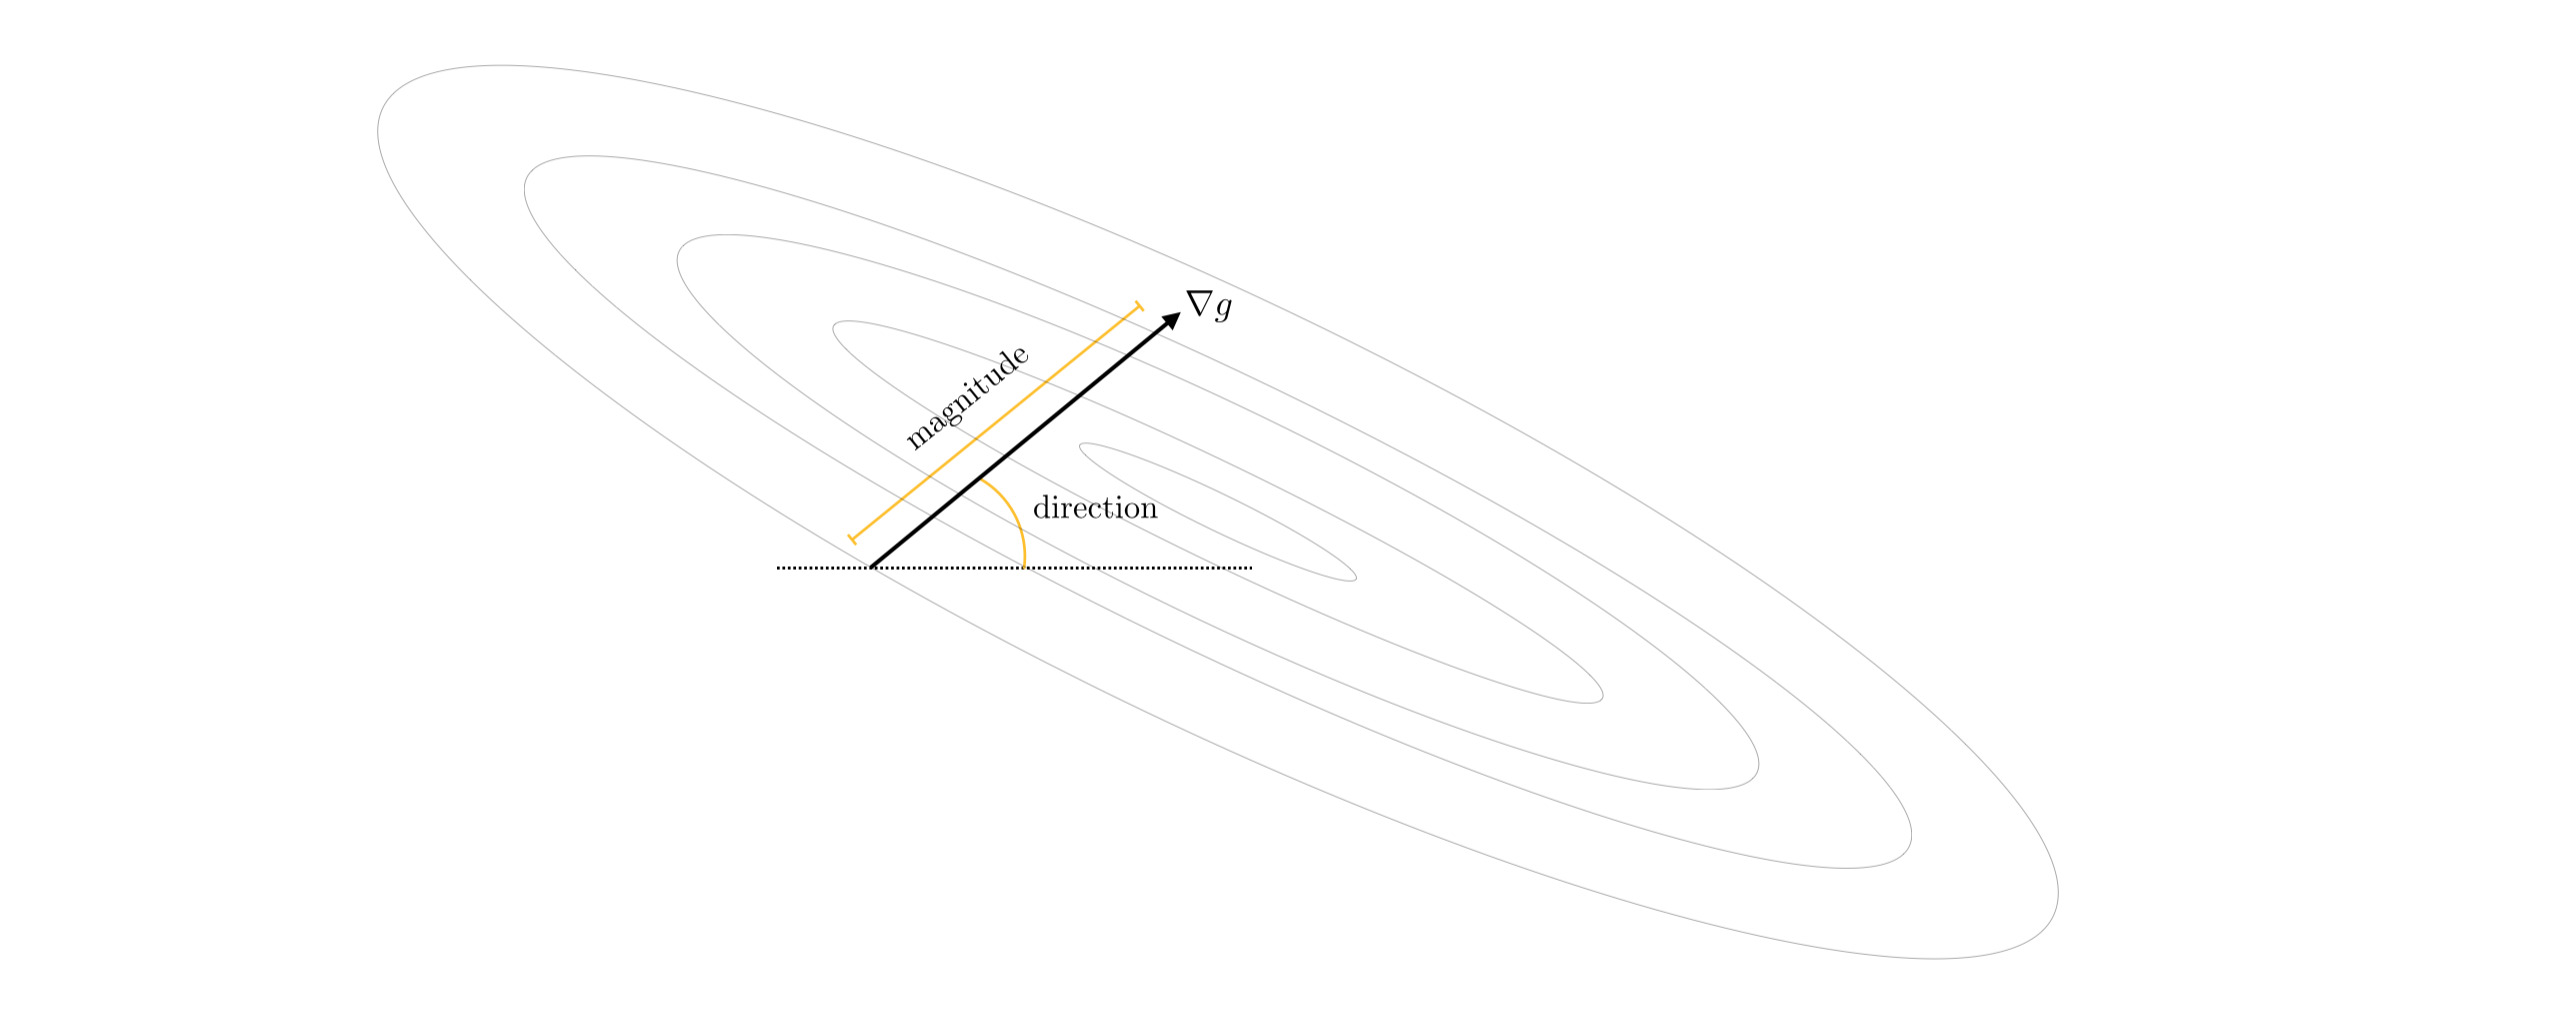

- Like any vectors, the negative gradient consists of a **<font color='red'>direction</font>** and a **<font color='blue'>magnitude</font>**.
- Depending on the minimization function, these attributes can pose different challenges when using the negative gradient as a descent direction.

### The negative gradient direction
- A fundamental property of the (negative) gradient direction is that it always points **perpendicular** to the contours of a function.
- The gradient ascent/descent direction at an input $\mathbf{w}^0$ is always perpendicular to the contour $g(\mathbf{w})=g(\mathbf{w}^0)$

### Example 1. Gradient descent directions on the contour plot of a quadratic function

\begin{equation*}
g\left(\mathbf{w}\right) = w_0^2 + w_1^2 + 2
\end{equation*}

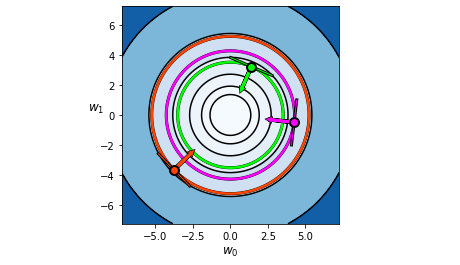

In [187]:
g = lambda w: w[0]**2 + w[1]**2 + 2
pts = np.array([[ 4.24698761,  1.39640246, -3.75877989],
               [-0.49560712,  3.22926095, -3.65478083]])
illustrate_gradients(g,pts);

### Example 2. Gradient descent directions on the contour plot of a wavy function

\begin{equation*}
g\left(\mathbf{w}\right) = w_0^2 + w_1^2 + 2\text{sin}\left(1.5\left(w_0 + w_1\right)\right)^2 + 2.
\end{equation*}

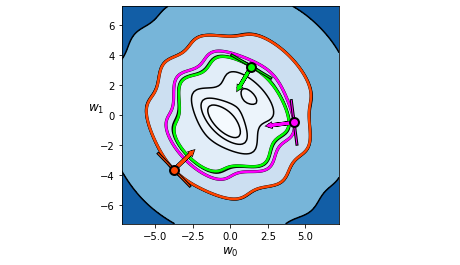

In [188]:
g = lambda w: w[0]**2 + w[1]**2 + 2*np.sin(1.5*(w[0] + w[1])) + 2
pts = np.array([[ 4.24698761,  1.39640246, -3.75877989],
               [-0.49560712,  3.22926095, -3.65478083]])
illustrate_gradients(g,pts)

### Example 3. Gradient descent directions on the contour plot of a standard non-convex test function

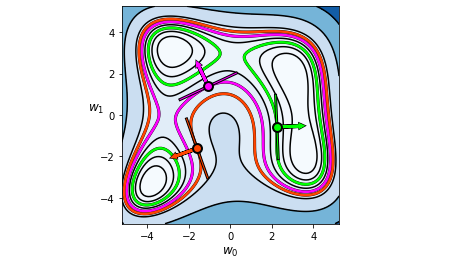

In [189]:
g = lambda w: (w[0]**2 + w[1] - 11)**2 + (w[0] + w[1]**2 - 7)**2
pts = np.array([[ 2.2430266 , -1.06962305, -1.60668751],
               [-0.57717812,  1.38128471, -1.61134124]])
illustrate_gradients(g,pts)

### The (negative) gradient direction points perpendicular to the contours of any function

- If we suppose $g\left(\mathbf{w}\right)$ is a differentiable function and $\mathbf{a}$ is some input point, then $\mathbf{a}$ lies on the contour defined by all those points where $g\left(\mathbf{w}\right) = g\left(\mathbf{a}\right) = c$ for some constant $c$.

- If we take another point from this contour $\mathbf{b}$ very close to $\mathbf{a}$ then the vector $\mathbf{a} - \mathbf{b}$ is essentially perpendicular to the gradient $\nabla g\left(\mathbf{a}\right)$ since 

\begin{equation*}\nabla g\left(\mathbf{a}\right)^T\left(\mathbf{a} - \mathbf{b}\right) = 0\end{equation*}

essentially defines the line in the input space whose normal vector is precisely $\nabla g\left(\mathbf{a}\right)$.

- So indeed both the ascent and descent directions defined by the gradient (i.e., the positive and negative gradient directions) of $g$ at $\mathbf{a}$ are perpendicular to the contour there.

- And since $\mathbf{a}$ was any arbitrary input of $g$, the same argument holds for each of its inputs.

## 1. The 'zig-zagging' behavior of gradient descent

- In practice the fact that the negative gradient always points perpendicular to the contour of a function can, *depending on the function being minimized*, make the negative gradient direction **<font color='red'>oscillate</font>** rapidly or **<font color='red'>zig-zag</font>** during a run of gradient descent.

- This in turn can cause **<font color='red'>zig-zagging behavior</font>** in the gradient descent steps themselves.

- Too much zig-zagging **<font color='red'>slows minimization progress</font>** and many gradient descent steps are required to adequately minimize a function.

### Example 4. Zig-zagging behavior of gradient descent on three simple quadratic functions

We consider three $N = 2$ dimensional quadratics that take the general form
\begin{equation}
g(\mathbf{w}) = a + \mathbf{b}^T\mathbf{w} + \mathbf{w}^T\mathbf{C}\mathbf{w}.
\end{equation}

The constants $a$ and $\mathbf{b}$ are set to zero, and the matrix $\mathbf{C}$ is set as follows

- the first quadratic (shown in the top panel below) has $\mathbf{C} = \begin{bmatrix} 0.5 & 0 \\ 0 & 12\end{bmatrix}$ 

- the second quadratic (shown in the middle panel below) has $\mathbf{C} = \begin{bmatrix} 0.1 & 0\\ 0 & 12\end{bmatrix}$ 

- the third quadratic (shown in the bottom panel below) has $\mathbf{C} = \begin{bmatrix} 0.01 & 0 \\ 0 & 12\end{bmatrix}$ 

The three quadratics differ only in the *<font color='red'>top left entry</font>* of their $\mathbf{C}$ matrix. As we change this single value of $\mathbf{C}$ we *<font color='red'>elongate</font>* the contours significantly along *the horizontal axis*.

We run 25 gradient descent steps with initialization at $\mathbf{w}^0 = \begin{bmatrix} 10 \\ 1 \end{bmatrix}$  and $\alpha = 10^{-1}$.

In [190]:
a1 = 0
b1 = 0*np.ones((2,1))
C1 = np.array([[0.5,0],[0,9.75]])
g1 = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]
w = np.array([10.0,1.0]); max_its = 25; alpha_choice = 10**(-1);
weight_history_1,cost_history_1 = gradient_descent(g1,alpha_choice,max_its,w)

a2 = 0
b2 = 0*np.ones((2,1))
C2 = np.array([[0.1,0],[0,9.75]])
g2 = lambda w: (a2 + np.dot(b2.T,w) + np.dot(np.dot(w.T,C2),w))[0]
weight_history_2,cost_history_2 = gradient_descent(g2,alpha_choice,max_its,w)

a3 = 0
b3 = 0*np.ones((2,1))
C3 = np.array([[0.01,0],[0,9.75]])
g3 = lambda w: (a3 + np.dot(b3.T,w) + np.dot(np.dot(w.T,C3),w))[0]
weight_history_3,cost_history_3 = gradient_descent(g3,alpha_choice,max_its,w)

histories = [weight_history_1,weight_history_2,weight_history_3]
gs = [g1,g2,g3]

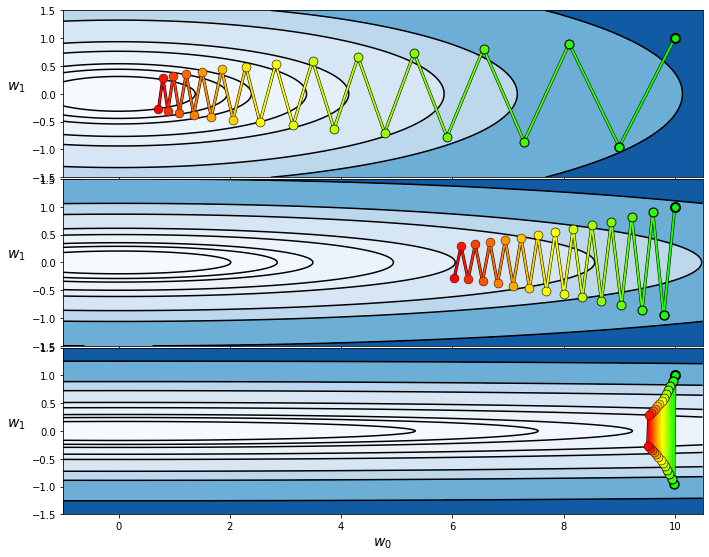

In [191]:
static_plotter.two_input_contour_vert_plots(gs,histories,num_contours = 20,xmin = -1,xmax = 10.5,ymin = -1.5,ymax = 1.5)

### The 'zig-zagging' behavior of gradient descent

The zig-zagging behavior of gradient descent in each of these cases above is completely due to the rapid change in negative gradient direction during each run.

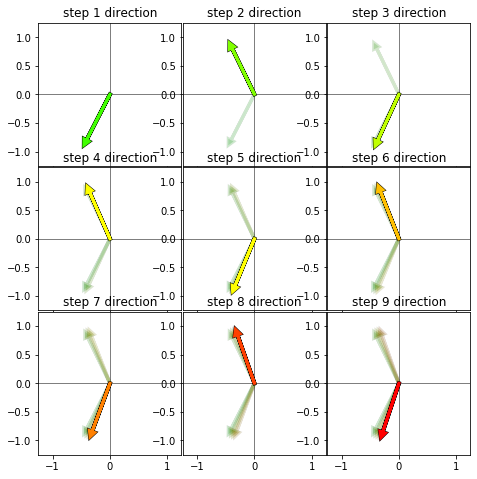

In [192]:
static_plotter.plot_grad_directions_v2(weight_history_1)

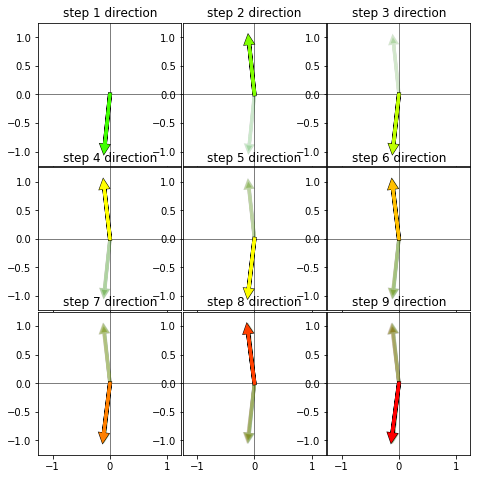

In [193]:
static_plotter.plot_grad_directions_v2(weight_history_2)

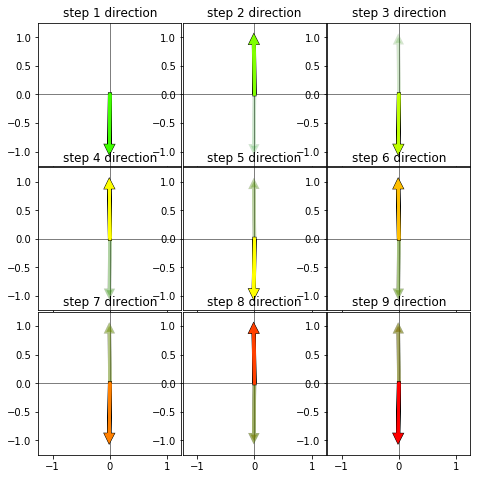

In [194]:
static_plotter.plot_grad_directions_v2(weight_history_3)

The slow convergence caused by zig-zagging in each case can be seen in the slow decrease of the cost function history associated with each run.

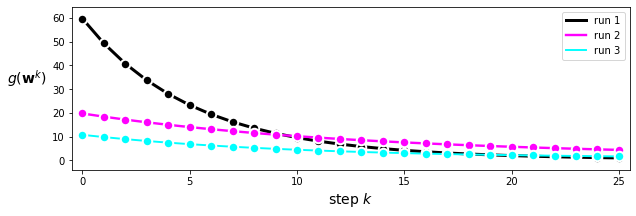

In [195]:
static_plotter.plot_cost_histories([cost_history_1,cost_history_2,cost_history_3],start = 0,points = True,labels = ['run 1','run 2','run 3'])

- We can ameilorate this zig-zagging behavior by *<font color='red'>reducing the steplength value</font>* $\alpha$. 
- However this does not solve the underlying problem that zig-zagging produces - which is **<font color='red'>slow convergence</font>**.  
- Typically in order to ameliorate or even eliminate zig-zagging this way requires a very small steplength, which leads back to the fundamental problem of slow convergence.  

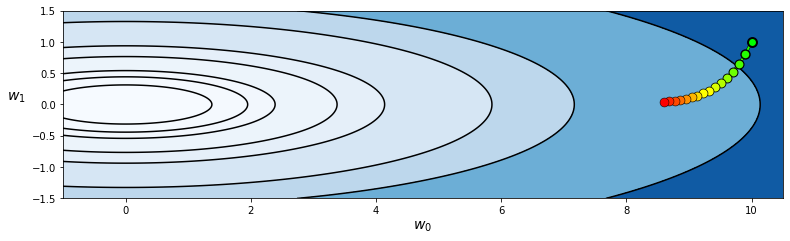

In [196]:
a1 = 0
b1 = 0*np.ones((2,1))
C1 = np.array([[0.5,0],[0,9.75]])
g1 = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]
w = np.array([10.0,1.0]); max_its = 15; alpha_choice = 10**(-2);
weight_history_1,cost_history_1 = gradient_descent(g1,alpha_choice,max_its,w)
static_plotter.two_input_contour_plot(g1,weight_history_1,show_original = False,num_contours = 20,xmin = -1,xmax = 10.5,ymin = -1.5,ymax = 1.5)

## 2. The (negative) gradient magnitude vanishes near stationary points

- As we know from the *first order condition for optimality*, the (negative) gradient vanishes at stationary points. 

- That is if $\mathbf{w}$ is a minimum, maximum, or saddle point then we know that $\nabla g\left(\mathbf{w}\right) = \mathbf{0}$.  

- *The magnitude of the gradient vanishes at stationary points*, that is $\Vert \nabla g \left(\mathbf{w}\right) \Vert_2 = 0$.

- By extension, the (negative) gradient at points *near a stationary point have non-zero direction but vanishing magnitude* i.e., $\Vert \nabla g \left(\mathbf{w}\right) \Vert_2 \approx 0$.

### The slow-crawling behavior of gradient descent

- Due to the vanishing behavior if the negative gradient magnitude near stationary points, gradient descent steps progress very slowly (or *crawl*) near stationary points.

- Consider the general local optimization step:

\begin{equation*}
\mathbf{w}^k = \mathbf{w}^{k-1} + \alpha \mathbf{d}^{k-1}
\end{equation*}

we saw that if $\mathbf{d}^{k-1}$ is a *unit length descent direction found by any zero order search approach* that the distance traveled with this step equals precisely the steplength value $\alpha$ since

\begin{equation*}
\left\Vert \mathbf{w}^k - \mathbf{w}^{k-1} \right\Vert_2 = \left\Vert \left(\mathbf{w}^{k-1} + \alpha \mathbf{d}^{k-1}\right) - \mathbf{w}^{k-1} \right\Vert_2 = \alpha \left\Vert \mathbf{d}^{k-1} \right\Vert_2 = \alpha.
\end{equation*}

Again here the key assumption made was that our descent direction $\mathbf{d}^{k-1}$ had *unit length*. 

- However, for gradient descent, our descent direction $\mathbf{d}^{k-1} = -\nabla g\left(\mathbf{w}^{k-1}\right)$ is *not*  guaranteed to have unit length

- We travel a distance *proportional to the magnitude of the gradient* = $\alpha \left\Vert \nabla g\left(\mathbf{w}^{k-1}\right) \right\Vert_2$:
\begin{equation*}
\left\Vert \mathbf{w}^k - \mathbf{w}^{k-1} \right\Vert_2 =  \left\Vert \left(\mathbf{w}^{k-1} - \alpha\nabla g\left(\mathbf{w}^{k-1}\right) \right) - \mathbf{w}^{k-1} \right\Vert_2  = \alpha \left\Vert \nabla g\left(\mathbf{w}^{k-1}\right) \right\Vert_2.
\end{equation*}



### Example 5. Slow-crawling behavior of GD near the minimum of a function

\begin{equation*}
g(w) = w^4 + 0.1
\end{equation*}

- We initialize far from the minimum and set the steplength $\alpha=10^{-1}$.

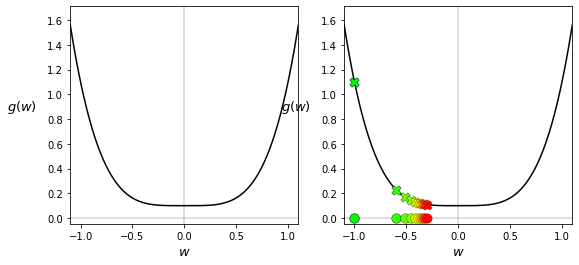

In [197]:
g = lambda w: w**4 + 0.1
w = -1.0; max_its = 10; alpha_choice = 10**(-1);
weight_history,cost_history = gradient_descent(g,alpha_choice,max_its,w)
static_plotter.single_input_plot(g,[weight_history],[cost_history],wmin = -1.1,wmax = 1.1)

- Gradient descent crawls as it approaches the minimum because the magnitude of the gradient vanishes here.

### Example 6. Slow-crawling behavior of GD near saddle points

Consider the non-convex function

\begin{equation*}
g(w) = \text{max}(0,(3w - 2.3)^3 + 1)^2 + \text{max}(0,(-3w + 0.7)^3 + 1)^2
\end{equation*}

which has a minimum at $w= \frac{1}{2}$ and saddle points at $w = \frac{7}{30}$ and $w = \frac{23}{30}$.

We make a run of gradient descent on this function using $50$ steps with $\alpha = 10^{-2}$, initialized such that it approaches one of these saddle points and so slows to a halt. 

In [198]:
g = lambda w: np.maximum(0,(3*w - 2.3)**3 + 1)**2 + np.maximum(0, (-3*w + 0.7)**3 + 1)**2

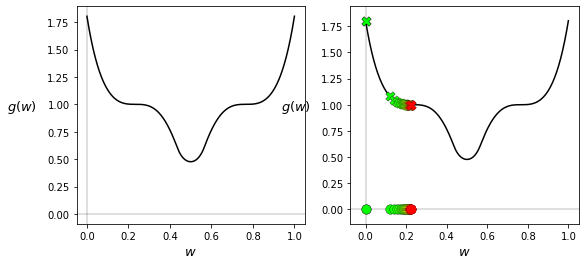

In [199]:
demo.draw_2d(g=g, w_inits = [0],steplength = 0.01,max_its = 50,version = 'unnormalized',wmin = 0,wmax = 1.0)

### Example 7. Slow-crawling behavior of GD in large flat regions of a function

\begin{equation*}
g(w_0,w_1) = \text{tanh}(4w_0 + 4w_1) + \text{max}(1,0.4w_0^2) + 1
\end{equation*}

- Gradient descent starting at the point $\mathbf{w}^0 = \begin{bmatrix} 2 \\ 2 \end{bmatrix}$, in a long narrow valley.

 - The magnitude of the gradient being almost zero here, we cannot make much progress employing $1000$ steps of gradient descent with a steplength $\alpha = 10^{-1}$.

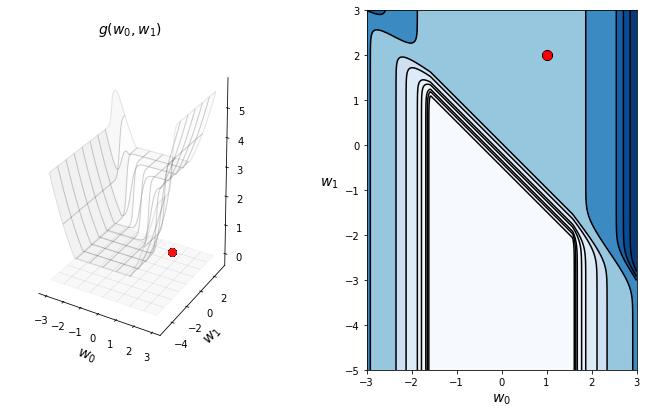

In [200]:
g = lambda w: np.tanh(4*w[0] + 4*w[1]) + max(0.4*w[0]**2,1) + 1
w = np.array([1.0,2.0]); max_its = 1000; alpha_choice = 10**(-1);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)
static_plotter.two_input_surface_contour_plot(g,weight_history_1,view = [20,300],num_contours = 20,xmin = -3,xmax = 3,ymin = -5,ymax = 3)